In [1]:
import os
import numpy as np
# To avoid some useless warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf

In [2]:
# load the data form each folder when use the server
# train_files = tf.io.gfile.glob('/root/lanyun-tmp/new_dataset/train/*/*')
# val_files = tf.io.gfile.glob('/root/lanyun-tmp/new_dataset/val/*/*')
# test_files = tf.io.gfile.glob('/root/lanyun-tmp/new_dataset/test/*/*')

# load the data form each folder when use my personal computer
train_files = tf.io.gfile.glob('C:/Users/Administrator/Desktop/Final Project   2025-1-1/new_dataset/train/*/*')
val_files = tf.io.gfile.glob('C:/Users/Administrator/Desktop/Final Project   2025-1-1/new_dataset/val/*/*')
test_files = tf.io.gfile.glob('C:/Users/Administrator/Desktop/Final Project   2025-1-1/new_dataset/test/*/*')

# print(f"Number of training files: {len(train_files)}")
# print(f"Number of validation files: {len(val_files)}")
# print(f"Number of testing files: {len(test_files)}")

## 1. Loading the dataset

### 1.1 Visualize the size of the dataset

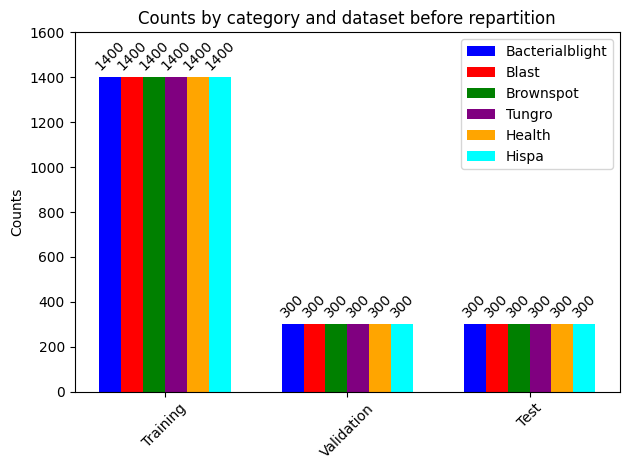

In [3]:
import matplotlib.pyplot as plt

def count_and_visualize(filenames, category_labels):
    def count(filenames):
        count_bacterialblight = len([filename for filename in filenames if "Bacterialblight" in filename])
        count_blast = len([filename for filename in filenames if "Blast" in filename])
        count_brownspot = len([filename for filename in filenames if "Brownspot" in filename])
        count_tungro = len([filename for filename in filenames if "Tungro" in filename])
        count_health = len([filename for filename in filenames if "Health" in filename])
        count_hispa = len([filename for filename in filenames if "Hispa" in filename])
        return count_bacterialblight, count_blast, count_brownspot, count_tungro, count_health, count_hispa

    # Calculate the number of each category in each dataset
    bacterialblight_counts = []
    blast_counts = []
    brownspot_counts = []
    tungro_counts = []
    health_counts = []
    hispa_counts = []
    
    for files in filenames:
        bacterialblight, blast, brownspot, tungro, health, hispa = count(files)
        bacterialblight_counts.append(bacterialblight)
        blast_counts.append(blast)
        brownspot_counts.append(brownspot)
        tungro_counts.append(tungro)
        health_counts.append(health)
        hispa_counts.append(hispa)

    # Visualize the number of each category in each folder before repartition
    categories = category_labels
    x = list(range(len(categories)))
    width = 0.12  # Adjusted for six categories

    fig, ax = plt.subplots()
    rects1 = ax.bar([xi - 2.5 * width for xi in x], bacterialblight_counts, width, label='Bacterialblight', color='blue')
    rects2 = ax.bar([xi - 1.5 * width for xi in x], blast_counts, width, label='Blast', color='red')
    rects3 = ax.bar([xi - 0.5 * width for xi in x], brownspot_counts, width, label='Brownspot', color='green')
    rects4 = ax.bar([xi + 0.5 * width for xi in x], tungro_counts, width, label='Tungro', color='purple')
    rects5 = ax.bar([xi + 1.5 * width for xi in x], health_counts, width, label='Health', color='orange')
    rects6 = ax.bar([xi + 2.5 * width for xi in x], hispa_counts, width, label='Hispa', color='cyan') 

    # Some details about the image
    ax.set_ylim(0, 1600)
    ax.set_ylabel('Counts')
    ax.set_title('Counts by category and dataset before repartition')
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=45)
    ax.legend()

    ax.bar_label(rects1, padding=3, rotation=45)
    ax.bar_label(rects2, padding=3, rotation=45)
    ax.bar_label(rects3, padding=3, rotation=45)
    ax.bar_label(rects4, padding=3, rotation=45)
    ax.bar_label(rects5, padding=3, rotation=45)
    ax.bar_label(rects6, padding=3, rotation=45)

    fig.tight_layout()

    plt.show()

file_lists = [train_files, val_files, test_files]
category_labels = ['Training', 'Validation', 'Test']
count_and_visualize(file_lists, category_labels)

Using a 3% of the data for debugging

In [4]:
# from sklearn.model_selection import train_test_split
# import random

# # Combine the list of filenames
# filenames = train_files + val_files + test_files

# # Randomly sample 10% of the files
# sampled_filenames = random.sample(filenames, int(len(filenames) * 0.03))

# # Extract category labels
# labels = [os.path.basename(os.path.dirname(name)) for name in sampled_filenames]

# # Split the dataset into 70% training, 15% validation, and 15% test sets
# train_filenames, temp_filenames, train_labels, temp_labels = train_test_split(
#     sampled_filenames, labels, test_size=0.3, random_state=42, stratify=labels)

# val_filenames, test_filenames, val_labels, test_labels = train_test_split(
#     temp_filenames, temp_labels, test_size=0.5, random_state=42, stratify=temp_labels)

# # Output the number of files in each section
# print(f"Number of training files: {len(train_filenames)}")
# print(f"Number of validation files: {len(val_filenames)}")
# print(f"Number of testing files: {len(test_filenames)}")

Use the full data set to train, validate and test the model

In [5]:
from sklearn.model_selection import train_test_split

filenames = train_files
filenames.extend(val_files)
filenames.extend(test_files)

# Extract category tags
labels = [os.path.basename(os.path.dirname(name)) for name in filenames]

# Split the data set so that the ratio of training set, verification set, and test set is 70% :15% :15%
train_filenames, temp_filenames, train_labels, temp_labels = train_test_split(
    filenames, labels, test_size=0.4, random_state=42, stratify=labels)

val_filenames, test_filenames, val_labels, test_labels = train_test_split(
    temp_filenames, temp_labels, test_size=0.5, random_state=42, stratify=temp_labels)

# Output the number of files for each section
print(f"Number of training files: {len(train_filenames)}")
print(f"Number of validation files: {len(val_filenames)}")
print(f"Number of testing files: {len(test_filenames)}")

Number of training files: 7200
Number of validation files: 2400
Number of testing files: 2400


## Data preprocessing

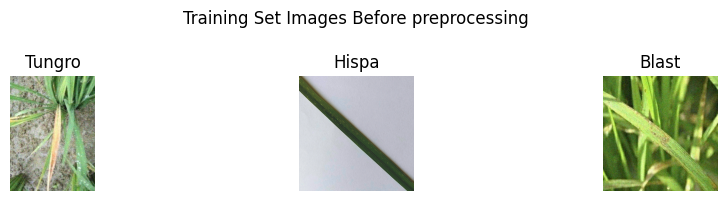

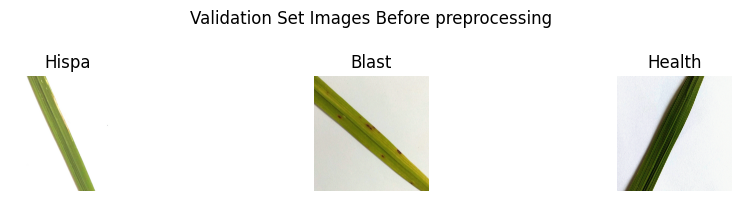

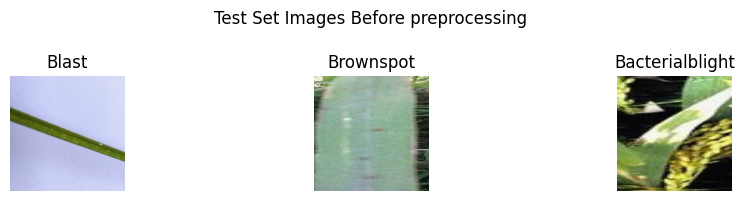

In [6]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

def show_images_with_labels(filenames, labels, title, num_images_to_show=3):
    # Select random files and labels
    sample_files = np.random.choice(filenames, num_images_to_show)
    sample_labels = [labels[filenames.index(file)] for file in sample_files]

    plt.figure(figsize=(10, 2))
    for i, (file_path, label) in enumerate(zip(sample_files, sample_labels)):
        # Read and decode images
        img = tf.io.read_file(file_path)
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.image.convert_image_dtype(img, tf.float32)

        # show the image before processing
        ax = plt.subplot(1, num_images_to_show, i + 1)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(label)
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Use this function to display training set, validation set, and test set images
show_images_with_labels(train_filenames, train_labels, 'Training Set Images Before preprocessing')
show_images_with_labels(val_filenames, val_labels, 'Validation Set Images Before preprocessing')
show_images_with_labels(test_filenames, test_labels, 'Test Set Images Before preprocessing')

In the displayed image, there is a lot of white space around the image, and more importantly, the size of the image is different, so the image size needs to be used.

In [7]:
# Create three tensorflow datasets that will be used for subsequent calculations to import the data into the model
train_list_ds = tf.data.Dataset.from_tensor_slices(train_filenames)
val_list_ds = tf.data.Dataset.from_tensor_slices(val_filenames)
test_list_ds = tf.data.Dataset.from_tensor_slices(test_filenames)

In [8]:
# To check the category of the image
NAMES = np.array([str(tf.strings.split(item, os.path.sep)[-1].numpy())[2:-1]
                        for item in tf.io.gfile.glob(str("C:/Users/Administrator/Desktop/Final Project   2025-1-1/new_dataset/train/*"))])
print(NAMES)

['Bacterialblight' 'Blast' 'Brownspot' 'Health' 'Hispa' 'Tungro']


### Transform the image size to 224*224, and use the function to process the image and label, including the one-hot encoding of the label

In [9]:
IMAGE_SIZE = (224, 224) 
def process_image_and_label(file_path):
    # get the category name
    label_name = tf.strings.split(file_path, os.path.sep)[-2]
    
    # define the category list
    class_names = ["Bacterialblight", "Blast", "Brownspot", "Health", "Tungro", "Hispa"]
    
    # convert the category name to the index
    label_index = tf.argmax(tf.cast(tf.equal(class_names, label_name), tf.int32))
    
    # convert the index to one-hot encoding
    label = tf.one_hot(label_index, depth=len(class_names))

    # Load the raw data from the file as a string
    img = tf.io.read_file(file_path)

    # Convert the compressed string to a 3D uint8 tensor
    img = tf.image.decode_jpeg(img, channels=3)

    # the image data is normalized to the range of [0,1]
    img = tf.image.convert_image_dtype(img, tf.float32)

    # Resize the image to the desired size
    img = tf.image.resize(img, IMAGE_SIZE)

    return img, label

# Applying the combined function to the datasets using the map method
train_ds = train_list_ds.map(process_image_and_label, num_parallel_calls=tf.data.experimental.AUTOTUNE)
val_ds = val_list_ds.map(process_image_and_label, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test_ds = test_list_ds.map(process_image_and_label, num_parallel_calls=tf.data.experimental.AUTOTUNE)

### Check the image after processing

In [10]:
for image, label in train_ds.take(1):
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())

Image shape:  (224, 224, 3)
Label:  [0. 0. 0. 0. 0. 1.]


In [11]:
import matplotlib.pyplot as plt
import tensorflow as tf

def show_batch(dataset, num_images, title):
    class_names = ["Bacterialblight", "Blast", "Brownspot", "Health","Tungro", "Hispa"]
    plt.figure(figsize=(10, 2))
    for images, labels in dataset.take(1):
        for i in range(num_images):
            ax = plt.subplot(1, num_images, i + 1)
            img = tf.image.convert_image_dtype(images[i], dtype=tf.uint8)
            plt.imshow(img.numpy())
            label_index = tf.argmax(labels[i]).numpy()
            plt.title(class_names[label_index])
            plt.axis("off")
    plt.suptitle(title)
    plt.show()

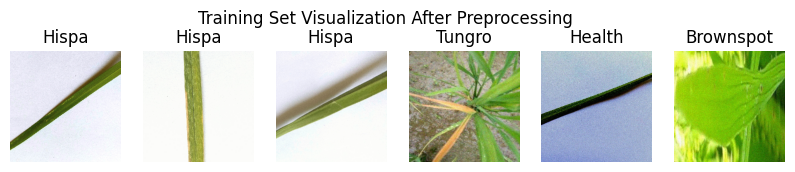

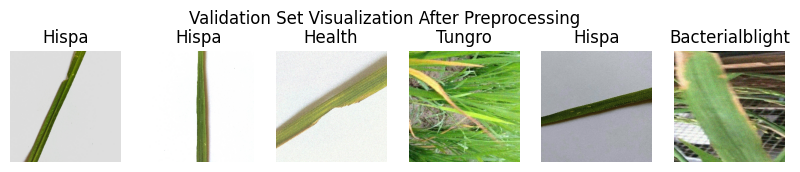

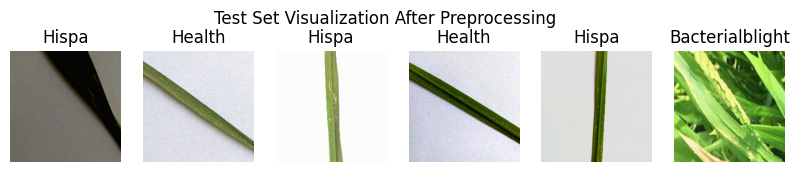

In [12]:
train_ds_visualization = train_ds.batch(6)
show_batch(train_ds_visualization, num_images=6, title='Training Set Visualization After Preprocessing')

val_ds_visualization = val_ds.batch(6)
show_batch(val_ds_visualization, num_images=6, title='Validation Set Visualization After Preprocessing')

test_ds_visualization = test_ds.batch(6)
show_batch(test_ds_visualization, num_images=6, title='Test Set Visualization After Preprocessing')

### Count the number of images in each dataset which will be used to train the model

In [13]:
TRAIN_IMG_COUNT = tf.data.experimental.cardinality(train_list_ds).numpy()
print("Training images count: " + str(TRAIN_IMG_COUNT))

VAL_IMG_COUNT = tf.data.experimental.cardinality(val_list_ds).numpy()
print("Validating images count: " + str(VAL_IMG_COUNT))

Training images count: 7200
Validating images count: 2400


## Prepare the data for training

In [14]:
# Scramble images, set batch sizes, set repetitions, and set accelerated training before each iteration
def prepare_for_training(ds, cache=True):
    # If caching is enabled
    if cache:
        # If cache is a string, assume it's a file path and cache the data to a file
        if isinstance(cache, str):
            ds = ds.cache(cache)
        else:
            # Otherwise, keep the data in memory
            ds = ds.cache()
    
    
    # Shuffle the dataset using the provided buffer size
    ds = ds.shuffle(buffer_size=2000)

    return ds

In [15]:
def change_batch_size(batch_size, ds):
    return ds.repeat().batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [16]:
# Prepare the training and validation datasets
train_ds = prepare_for_training(train_ds)
val_ds = prepare_for_training(val_ds)

## 3. Build the model and search the best hyperparameters using BayesianOptimization

3.1 VGG16

In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

normal_callbacks = [
    EarlyStopping(patience=3, verbose=0, restore_best_weights=True, monitor='val_accuracy'),
    ReduceLROnPlateau(factor=0.5, patience=2, min_lr=1e-8, verbose=1, monitor='val_accuracy'),
]

3.1.1 Build the VGG16 model

In [18]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.initializers import Constant
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.regularizers import l1_l2
from bayes_opt import BayesianOptimization
from bayes_opt.logger import JSONLogger
from bayes_opt.event import Events
from tensorflow.keras import backend as K
import tensorflow_addons as tfa

def build_VGG16_model(dropout_rate, optimizer_choice, learning_rate, l1_reg, l2_reg, fc_units):
    # Create the base model which download in the Internet but it isn't freeze the weight of the layers
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    
    # To freeze the layer
    for layer in base_model.layers:
        layer.trainable = False

    # Copare to the initial model, the Dense layer and the Dropout layer are changed
    x = Flatten()(base_model.output)
    x = Dense(fc_units, activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg))(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(fc_units, activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg))(x)
    x = Dropout(dropout_rate)(x)
    predictions = Dense(6, activation='softmax')(x)

    # Create the model
    model = Model(inputs=base_model.input, outputs=predictions)

    # Choose the optimizer
    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_choice == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)    
    else:
        optimizer = RMSprop(learning_rate=learning_rate)

    # Compile the model and set the loss function, optimizer and the evaluation metrics
    model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy',
              metrics=[
                  'accuracy',
                  tf.keras.metrics.Precision(name='precision'),
                  tf.keras.metrics.Recall(name='recall'),
                  tfa.metrics.F1Score(name='f1_score', threshold=0.5, num_classes=6)
              ])
    return model

e:\anaconda3\envs\tf\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
e:\anaconda3\envs\tf\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're usi

In [19]:
# Will be used to find the best hyperparameters
def fit_VGG16(lr, batch_size_index, optimizer_index, dropout_rate, l1_reg, l2_reg, fc_units_index):
    K.clear_session()
    
    # List the hyperparameters to be selected as an array
    batch_sizes = [8, 16, 32]
    optimizer_choices = ['adam', 'sgd', 'rmsprop']
    fc_units_choices = [128, 256, 512]

    batch_size = batch_sizes[int(batch_size_index)]
    optimizer_choice = optimizer_choices[int(optimizer_index)]
    fc_units = fc_units_choices[int(fc_units_index)]
    print(f'Cerrent batch size is {batch_size} and fc_units is {fc_units}')

    # The hyperparameters of this iteration are trained
    VGG16_model = build_VGG16_model(dropout_rate=dropout_rate, optimizer_choice=optimizer_choice, learning_rate=lr, l1_reg=l1_reg, l2_reg=l2_reg, fc_units=fc_units)

    train_ds_local = change_batch_size(batch_size, train_ds)
    val_ds_local = change_batch_size(batch_size, val_ds)

    steps_per_epoch = max(1, TRAIN_IMG_COUNT // batch_size)
    validation_steps = max(1, VAL_IMG_COUNT // batch_size)

    # training the model and trying to find the best hyperparameter
    VGG_history = VGG16_model.fit(
        train_ds_local,
        steps_per_epoch=steps_per_epoch,
        epochs=15,
        verbose=1,
        validation_data=val_ds_local,
        validation_steps=validation_steps,
        callbacks=normal_callbacks
    )
    # get the best accuracy and validation accuracy will be the best hyperparameter evaluation index
    best_accuracy = max(VGG_history.history['val_accuracy'])
    return best_accuracy

In [20]:
# set the range of the hyperparameters which will be change in each iteration
HP_range = {
    'lr': (1e-7, 5e-6),
    'batch_size_index': (0, 3),
    'optimizer_index': (0, 3),
    'dropout_rate': (0.0, 0.5),
    'l1_reg': (1e-5, 1e-4),
    'l2_reg': (1e-5, 1e-4),
    'fc_units_index': (0, 3)
}

# set the Bayesian Optimization
VGG16_optimizer = BayesianOptimization(
    f=fit_VGG16, # function name, it will be called with different hyperparameters in each iteration
    pbounds=HP_range, # hyperparameters
    random_state=42, # random seed
    verbose= 2
)

# Record all iteration results in an external file for later presentation
logger = JSONLogger(path="./Stage_2_VGGlogs.json")
VGG16_optimizer.subscribe(Events.OPTIMIZATION_STEP, logger)

# Random search for two times, then 10 times Bayesian optimization to find the best hyperparameters
VGG16_optimizer.maximize(init_points=2, n_iter=10)

Cerrent batch size is 16 and fc_units is 512
Epoch 1/15
450/450 [==============================] - 55s 92ms/step - loss: 8.9058 - accuracy: 0.1967 - precision: 0.2042 - recall: 0.0312 - f1_score: 0.0526 - val_loss: 8.4668 - val_accuracy: 0.4038 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00 - lr: 8.6437e-07
Epoch 2/15
450/450 [==============================] - 16s 37ms/step - loss: 8.5362 - accuracy: 0.2786 - precision: 0.3719 - recall: 0.0371 - f1_score: 0.0659 - val_loss: 8.2157 - val_accuracy: 0.5371 - val_precision: 1.0000 - val_recall: 0.0017 - val_f1_score: 0.0033 - lr: 8.6437e-07
Epoch 3/15
450/450 [==============================] - 17s 37ms/step - loss: 8.2929 - accuracy: 0.3388 - precision: 0.4656 - recall: 0.0517 - f1_score: 0.0895 - val_loss: 8.0089 - val_accuracy: 0.5858 - val_precision: 0.9375 - val_recall: 0.0125 - val_f1_score: 0.0237 - lr: 8.6437e-07
Epoch 4/15
450/450 [==============================] - 17s 37ms/step - loss: 8.0834 - acc

3.1.3 Show the result of bayesian hyperparameter search

In [21]:
# Define the mapping table manually
batch_sizes = [8, 16, 32]
optimizer_choices = ['adam', 'sgd', 'rmsprop']
fc_units_choices = [128, 256, 512]

# Initialize variables to store the best results
best_iteration = None
best_target = float('-inf')

# Print all the results of iterations each time
print("The result of all iteration of VGGNet:")
# Gets the hyperparameter of 12 iterations from the file
for i, res in enumerate(VGG16_optimizer.res):
    params = res['params']
    readable_params = {
        'batch_size': batch_sizes[int(params['batch_size_index'])],
        'optimizer': optimizer_choices[int(params['optimizer_index'])],
        'fc_units': fc_units_choices[int(params['fc_units_index'])],
        'dropout_rate': params['dropout_rate'],
        'l1_reg': params['l1_reg'],
        'l2_reg': params['l2_reg'],
        'lr': params['lr']
    }
    # Print the result of each iteration
    print(f"Iteration {i+1}:")
    print(f"Target: {res['target']:.4f}")
    print("Hyperparameters:")
    for key, value in readable_params.items(): 
        print(f"  {key}: {value}")
    print()

    # Update the best iteration result
    if res['target'] > best_target:
        best_target = res['target']
        best_iteration = (i+1, readable_params, best_target)

# Print the best result in 12 ineration
if best_iteration:
    iteration_number, params, target = best_iteration
    print("The best result of VGGNet is:")
    print(f"Iteration {iteration_number}:")
    print(f"Target: {target:.4f}")
    print("Parameters:")
    for key, value in params.items():
        print(f"  {key}: {value}")

The result of all iteration of VGGNet:
Iteration 1:
Target: 0.7075
Hyperparameters:
  batch_size: 16
  optimizer: adam
  fc_units: 512
  dropout_rate: 0.4753571532049581
  l1_reg: 6.38792635777333e-05
  l2_reg: 2.4041677639819287e-05
  lr: 8.64373149647393e-07

Iteration 2:
Target: 0.8133
Hyperparameters:
  batch_size: 32
  optimizer: adam
  fc_units: 512
  dropout_rate: 0.3005575058716044
  l1_reg: 1.185260448662222e-05
  l2_reg: 9.72918866945795e-05
  lr: 4.178968939922067e-06

Iteration 3:
Target: 0.7921
Hyperparameters:
  batch_size: 32
  optimizer: adam
  fc_units: 512
  dropout_rate: 0.2575688367305503
  l1_reg: 1.3213985412532879e-05
  l2_reg: 4.2864702011022584e-05
  lr: 2.447929802237665e-06

Iteration 4:
Target: 0.6679
Hyperparameters:
  batch_size: 32
  optimizer: adam
  fc_units: 256
  dropout_rate: 0.4978587215616521
  l1_reg: 3.505115752806602e-05
  l2_reg: 8.790009462350525e-05
  lr: 1.440997933131459e-06

Iteration 5:
Target: 0.7962
Hyperparameters:
  batch_size: 16
  o

3.1.4 Use the best parameters to train the model again

In [22]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

VGG_callbacks = [
    EarlyStopping(patience=5, verbose=1, restore_best_weights=True, monitor='val_accuracy'),
    ReduceLROnPlateau(factor=0.5, patience=2, min_lr=1e-8, verbose=1, monitor='val_accuracy'),
    ModelCheckpoint('Stage_2_model-VGGNet.weights.h5', verbose=1, save_best_only=True, monitor='val_accuracy'),
]

In [23]:
VGG_best_params = VGG16_optimizer.max['params']

# 解析最优参数
best_lr = VGG_best_params['lr']
best_batch_size_index = int(VGG_best_params['batch_size_index'])
best_optimizer_index = int(VGG_best_params['optimizer_index'])
best_dropout_rate = VGG_best_params['dropout_rate']
best_l1_reg = VGG_best_params['l1_reg']
best_l2_reg = VGG_best_params['l2_reg']
best_fc_units_index = int(VGG_best_params['fc_units_index'])

# 定义 batch_size 和 optimizer_choice 的映射
batch_sizes = [8, 16, 32]
optimizer_choices = ['adam', 'sgd', 'rmsprop']
fc_units_choices = [128, 256, 512]

# 获取实际的 batch_size, optimizer_choice 和 fc_units
best_batch_size = batch_sizes[best_batch_size_index]
best_optimizer_choice = optimizer_choices[best_optimizer_index]
best_fc_units = fc_units_choices[best_fc_units_index]

# use the best hyperparameter to train the model again

K.clear_session()
VGG16_best_model = build_VGG16_model(dropout_rate=best_dropout_rate, optimizer_choice=best_optimizer_choice, learning_rate=best_lr, l1_reg=best_l1_reg, l2_reg=best_l2_reg, fc_units=best_fc_units)

train_ds_local = change_batch_size(best_batch_size, train_ds)
val_ds_local = change_batch_size(best_batch_size, val_ds)

steps_per_epoch = max(1, TRAIN_IMG_COUNT // best_batch_size)
validation_steps = max(1, VAL_IMG_COUNT // best_batch_size)

# retrain the model
VGG16_best_history = VGG16_best_model.fit(
    train_ds_local,
    steps_per_epoch=steps_per_epoch,
    epochs=20,
    validation_data=val_ds_local,
    validation_steps=validation_steps,
    callbacks=VGG_callbacks
)

# print new training result
new_best_accuacy = max(VGG16_best_history.history['val_accuracy'])
print("The new best accuracy in VGGNet is:", new_best_accuacy)


Epoch 1/20
449/450 [============================>.] - ETA: 0s - loss: 10.2893 - accuracy: 0.5443 - precision: 0.8688 - recall: 0.1641 - f1_score: 0.2382
Epoch 1: val_accuracy improved from -inf to 0.65708, saving model to Stage_2_model-VGGNet.weights.h5
450/450 [==============================] - 18s 40ms/step - loss: 10.2879 - accuracy: 0.5442 - precision: 0.8675 - recall: 0.1646 - f1_score: 0.2388 - val_loss: 9.5686 - val_accuracy: 0.6571 - val_precision: 0.8795 - val_recall: 0.3892 - val_f1_score: 0.4604 - lr: 3.9484e-06
Epoch 2/20
449/450 [============================>.] - ETA: 0s - loss: 9.0587 - accuracy: 0.6885 - precision: 0.8609 - recall: 0.4496 - f1_score: 0.5374
Epoch 2: val_accuracy improved from 0.65708 to 0.71500, saving model to Stage_2_model-VGGNet.weights.h5
450/450 [==============================] - 17s 37ms/step - loss: 9.0571 - accuracy: 0.6888 - precision: 0.8611 - recall: 0.4501 - f1_score: 0.5378 - val_loss: 8.5625 - val_accuracy: 0.7150 - val_precision: 0.8607 - 

3.1.5 Show the training result

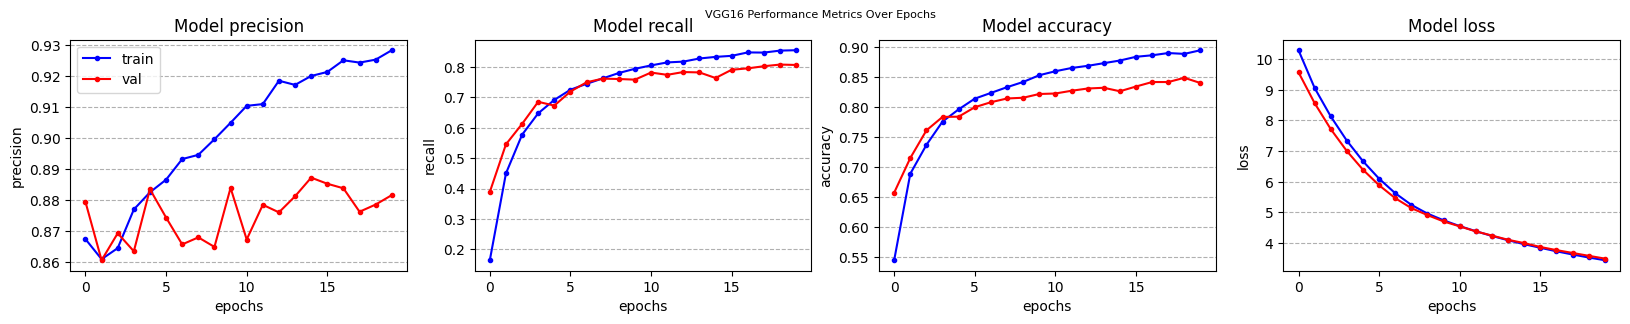

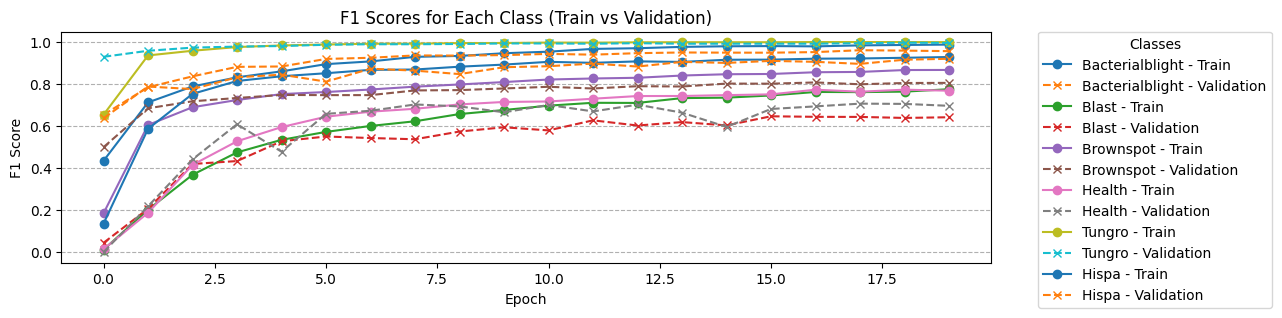

In [24]:
# Data visualization
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()
for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(VGG16_best_history.history[met], color='blue', linestyle='-', marker='o', markersize=3)
    ax[i].plot(VGG16_best_history.history['val_' + met], color='red', linestyle='-', marker='o', markersize=3)
    if i == 0:
        ax[i].legend(['train', 'val'])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].grid(axis='y', linestyle='--')

plt.suptitle('VGG16 Performance Metrics Over Epochs', fontsize=8)
plt.show()

# drew the f1 score of the train and val
class_names = ['Bacterialblight', 'Blast', 'Brownspot', 'Health', 'Tungro', 'Hispa']
# get the f1 score of the train and val
train_f1_scores = VGG16_best_history.history['f1_score']
val_f1_scores = VGG16_best_history.history['val_f1_score']

plt.figure(figsize=(12, 3))
# plot the f1 score of the train and val
for i, class_name in enumerate(class_names):
    plt.plot([epoch[i] for epoch in train_f1_scores], label=f"{class_name} - Train", marker='o', linestyle='-')
    plt.plot([epoch[i] for epoch in val_f1_scores], label=f"{class_name} - Validation", marker='x', linestyle='--')

plt.title("F1 Scores for Each Class (Train vs Validation)")
plt.xlabel("Epoch")
plt.legend(title="Classes", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel("F1 Score")
plt.grid(axis='y', linestyle='--')
plt.show()

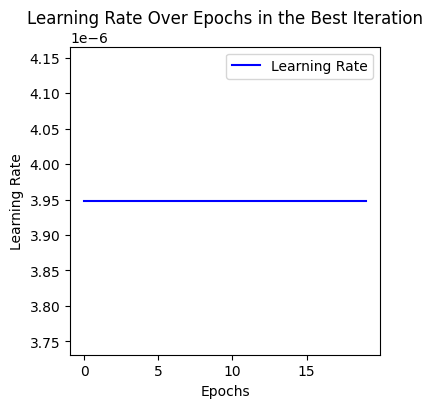

In [25]:
# print the learning rate
plt.figure(figsize=(4, 4))
plt.plot(VGG16_best_history.history['lr'], label='Learning Rate', color='b')
plt.title('Learning Rate Over Epochs in the Best Iteration')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.legend()
plt.show()

3.2 Build the DenseNet 121 model

3.2.1 Build the DenseNet model and search the best hyperparameters using BayesianOptimization

In [26]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.models import Model

# The procedure is basically the same as VGG16
def build_densenet_model(dropout_rate, optimizer_choice, learning_rate, l1_reg, l2_reg, fc_units):
    # Load the pre-trained DenseNet121 model
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    
    # Freeze the layers of the pre-trained model
    for layer in base_model.layers:
        layer.trainable = False

    # Add a global average pooling layer
    x = GlobalAveragePooling2D()(base_model.output)
    # Add a dense layer and a dropout layer
    x = Dense(fc_units, activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg))(x)
    x = Dropout(dropout_rate)(x)
    predictions = Dense(6, activation='softmax')(x)

    # Compile the model
    model = Model(inputs=base_model.input, outputs=predictions)

    # Choose the optimizer
    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_choice == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
    else:
        optimizer = RMSprop(learning_rate=learning_rate)

    # Compile the model with the optimizer, loss function, and evaluation metrics
    model.compile(optimizer=optimizer, 
                  loss='binary_crossentropy', 
                  metrics=['accuracy', 
                           tf.keras.metrics.Precision(name='precision'), 
                           tf.keras.metrics.Recall(name='recall'),
                           tfa.metrics.F1Score(name='f1_score', threshold=0.5, num_classes=6)
                           ])
    return model

def fit_densenet(lr, batch_size_index, optimizer_index, dropout_rate, l1_reg, l2_reg, fc_units_index):

    K.clear_session()

    # Define the mapping table manually
    batch_sizes = [8, 16, 32]
    optimizer_choices = ['adam', 'sgd', 'rmsprop']
    fc_units_choices = [128, 256, 512]

    batch_size = batch_sizes[int(batch_size_index)]
    optimizer_choice = optimizer_choices[int(optimizer_index)]
    fc_units = fc_units_choices[int(fc_units_index)]
    print(f'Cerrent batch size is {batch_size} and fc_units is {fc_units}')

    # Build the model and train it using different hyperparameters
    model = build_densenet_model(dropout_rate=dropout_rate, optimizer_choice=optimizer_choice, learning_rate=lr, l1_reg=l1_reg, l2_reg=l2_reg, fc_units=fc_units)

    train_ds_local = change_batch_size(batch_size, train_ds)
    val_ds_local = change_batch_size(batch_size, val_ds)

    steps_per_epoch = max(1, TRAIN_IMG_COUNT // batch_size)
    validation_steps = max(1, VAL_IMG_COUNT // batch_size)

    DenseNet_history = model.fit(
        train_ds_local,
        steps_per_epoch=steps_per_epoch,
        epochs=15,
        validation_data=val_ds_local,
        validation_steps=validation_steps,
        callbacks=normal_callbacks
    )

    best_accuracy = max(DenseNet_history.history['val_accuracy'])
    return best_accuracy

# Define the bounds of the hyperparameters
pbounds = {
    'lr': (1e-6, 5e-4),
    'batch_size_index': (0, 3),
    'optimizer_index': (0, 3),
    'dropout_rate': (0.0, 0.5),
    'l1_reg': (2e-5, 2e-3),
    'l2_reg': (2e-5, 2e-3),
    'fc_units_index': (0, 3)
}

DenseNet_optimizer = BayesianOptimization(
    f=fit_densenet, # Define the function to fit, each time fit_densenet will accept different hyperparameters in pbounds.
    pbounds=pbounds, # Define the bounds of the hyperparameters
    random_state=42, # Set the random state
    verbose=2
)

# save the result of each iteration
logger = JSONLogger(path="./Stage_2_densenet_logs.json")
DenseNet_optimizer.subscribe(Events.OPTIMIZATION_STEP, logger)

# 2 times of random search and 10 times of bayesian optimization
DenseNet_optimizer.maximize(init_points=2, n_iter=10)

Cerrent batch size is 16 and fc_units is 512
Epoch 1/15
450/450 [==============================] - 22s 43ms/step - loss: 12.5004 - accuracy: 0.5696 - precision: 0.7209 - recall: 0.4028 - f1_score: 0.4915 - val_loss: 6.0518 - val_accuracy: 0.7446 - val_precision: 0.8897 - val_recall: 0.5750 - val_f1_score: 0.6590 - lr: 7.8841e-05
Epoch 2/15
450/450 [==============================] - 18s 40ms/step - loss: 2.9541 - accuracy: 0.7110 - precision: 0.8155 - recall: 0.6079 - f1_score: 0.6664 - val_loss: 1.3038 - val_accuracy: 0.7808 - val_precision: 0.8771 - val_recall: 0.6779 - val_f1_score: 0.7358 - lr: 7.8841e-05
Epoch 3/15
450/450 [==============================] - 18s 40ms/step - loss: 0.9251 - accuracy: 0.7429 - precision: 0.8367 - recall: 0.6325 - f1_score: 0.6901 - val_loss: 0.6649 - val_accuracy: 0.7721 - val_precision: 0.8803 - val_recall: 0.6525 - val_f1_score: 0.7115 - lr: 7.8841e-05
Epoch 4/15
449/450 [============================>.] - ETA: 0s - loss: 0.5668 - accuracy: 0.7464 - p

In [27]:
# Define the mapping table
batch_sizes = [8, 16, 32]
optimizer_choices = ['adam', 'sgd', 'rmsprop']
fc_units_choices = [128, 256, 512]

# Initialize variables to store the best result
best_iteration = None
best_target = float('-inf')

# Print all the results of the iterations
print("The result of all iteration of DenseNet:")
for i, res in enumerate(DenseNet_optimizer.res):
    params = res['params']
    readable_params = {
        'batch_size': batch_sizes[int(params['batch_size_index'])],
        'optimizer': optimizer_choices[int(params['optimizer_index'])],
        'fc_units': fc_units_choices[int(params['fc_units_index'])],
        'dropout_rate': params['dropout_rate'],
        'l1_reg': params['l1_reg'],
        'l2_reg': params['l2_reg'],
        'lr': params['lr']
    }
    print(f"Iteration {i+1}:")
    print(f"Target: {res['target']:.4f}")
    print("Parameters:")
    for key, value in readable_params.items():
        print(f"  {key}: {value}")
    print()

    # Update the best iteration result
    if res['target'] > best_target:
        best_target = res['target']
        best_iteration = (i+1, readable_params, best_target)

# Print the best result
if best_iteration:
    iteration_number, params, target = best_iteration
    print("The best result of DenseNet is:")
    print(f"Iteration {iteration_number}:")
    print(f"Target: {target:.4f}")
    print("Parameters:")
    for key, value in params.items():
        print(f"  {key}: {value}")

The result of all iteration of DenseNet:
Iteration 1:
Target: 0.7808
Parameters:
  batch_size: 16
  optimizer: adam
  fc_units: 512
  dropout_rate: 0.4753571532049581
  l1_reg: 0.0012053437987101325
  l2_reg: 0.0003289169080760243
  lr: 7.884126564776511e-05

Iteration 2:
Target: 0.9000
Parameters:
  batch_size: 32
  optimizer: adam
  fc_units: 512
  dropout_rate: 0.3005575058716044
  l1_reg: 6.075729870568885e-05
  l2_reg: 0.0019404215072807488
  lr: 0.00041638887775941047

Iteration 3:
Target: 0.8775
Parameters:
  batch_size: 32
  optimizer: adam
  fc_units: 512
  dropout_rate: 0.2575688367305503
  l1_reg: 9.070767907572332e-05
  l2_reg: 0.000743023444242497
  lr: 0.00024010550435032545

Iteration 4:
Target: 0.7842
Parameters:
  batch_size: 32
  optimizer: adam
  fc_units: 256
  dropout_rate: 0.2716883749500123
  l1_reg: 0.0014601160454099874
  l2_reg: 0.0007385317671145408
  lr: 2.4357627059647904e-05

Iteration 5:
Target: 0.7908
Parameters:
  batch_size: 16
  optimizer: rmsprop
  f

In [28]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

DenseNet_callbacks = [
    EarlyStopping(patience=5, verbose=1, restore_best_weights=True, monitor='val_accuracy'),
    ReduceLROnPlateau(factor=0.5, patience=2, min_lr=1e-8, verbose=1, monitor='val_accuracy'),
    ModelCheckpoint('Stage_2_model-DenseNet.weights.h5', verbose=1, save_best_only=True, monitor='val_accuracy'),
]

In [29]:
# Get the best parameters in DenseNet
DenseNet_best_params = DenseNet_optimizer.max['params']  

best_lr = DenseNet_best_params['lr']
best_batch_size_index = int(DenseNet_best_params['batch_size_index'])
best_optimizer_index = int(DenseNet_best_params['optimizer_index'])
best_dropout_rate = DenseNet_best_params['dropout_rate']
best_l1_reg = DenseNet_best_params['l1_reg']
best_l2_reg = DenseNet_best_params['l2_reg']
best_fc_units_index = int(DenseNet_best_params['fc_units_index'])

# Get the actual batch size and optimizer choice based on the index
batch_sizes = [4, 8, 16]
optimizer_choices = ['adam', 'sgd', 'rmsprop']
best_batch_size = batch_sizes[best_batch_size_index]
best_optimizer_choice = optimizer_choices[best_optimizer_index]
best_fc_units = fc_units_choices[best_fc_units_index]

tf.keras.backend.clear_session()

# Build the model with the best hyperparameters
best_DenseNet_model = build_densenet_model(
    dropout_rate=best_dropout_rate,
    optimizer_choice=best_optimizer_choice,
    learning_rate=best_lr,
    l1_reg=best_l1_reg,
    l2_reg=best_l2_reg,
    fc_units=best_fc_units
)

# Prepare the datasets
train_ds_local = change_batch_size(best_batch_size, train_ds)
val_ds_local = change_batch_size(best_batch_size, val_ds)

# Train the model with the best hyperparameters
DenseNet_best_history = best_DenseNet_model.fit(
    train_ds_local,
    epochs = 20, 
    validation_data=val_ds_local,
    steps_per_epoch=TRAIN_IMG_COUNT // best_batch_size,
    validation_steps=VAL_IMG_COUNT // best_batch_size,
    callbacks=DenseNet_callbacks
)

# Print the new training result
new_best_accuracy = max(DenseNet_best_history.history['val_accuracy'])
print("The new best accuacy in DenseNet is:", new_best_accuracy)

Epoch 1/20
449/450 [============================>.] - ETA: 0s - loss: 0.8400 - accuracy: 0.7684 - precision: 0.8361 - recall: 0.7102 - f1_score: 0.7571
Epoch 1: val_accuracy improved from -inf to 0.86625, saving model to Stage_2_model-DenseNet.weights.h5
450/450 [==============================] - 23s 45ms/step - loss: 0.8389 - accuracy: 0.7686 - precision: 0.8362 - recall: 0.7104 - f1_score: 0.7573 - val_loss: 0.3572 - val_accuracy: 0.8662 - val_precision: 0.8939 - val_recall: 0.8462 - val_f1_score: 0.8627 - lr: 4.1639e-04
Epoch 2/20
449/450 [============================>.] - ETA: 0s - loss: 0.2931 - accuracy: 0.8558 - precision: 0.8830 - recall: 0.8281 - f1_score: 0.8492
Epoch 2: val_accuracy did not improve from 0.86625
450/450 [==============================] - 18s 40ms/step - loss: 0.2930 - accuracy: 0.8557 - precision: 0.8830 - recall: 0.8281 - f1_score: 0.8492 - val_loss: 0.2543 - val_accuracy: 0.8487 - val_precision: 0.8670 - val_recall: 0.8254 - val_f1_score: 0.8436 - lr: 4.163

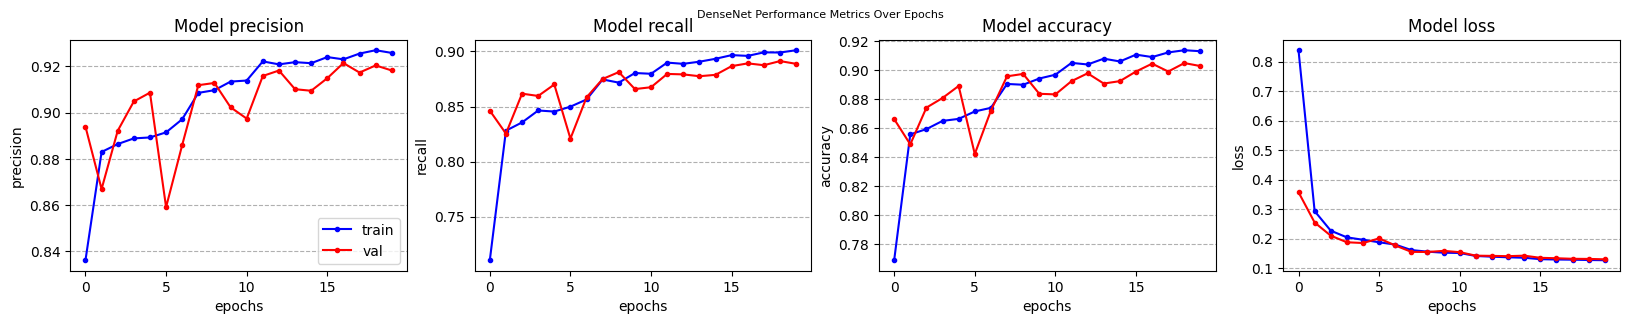

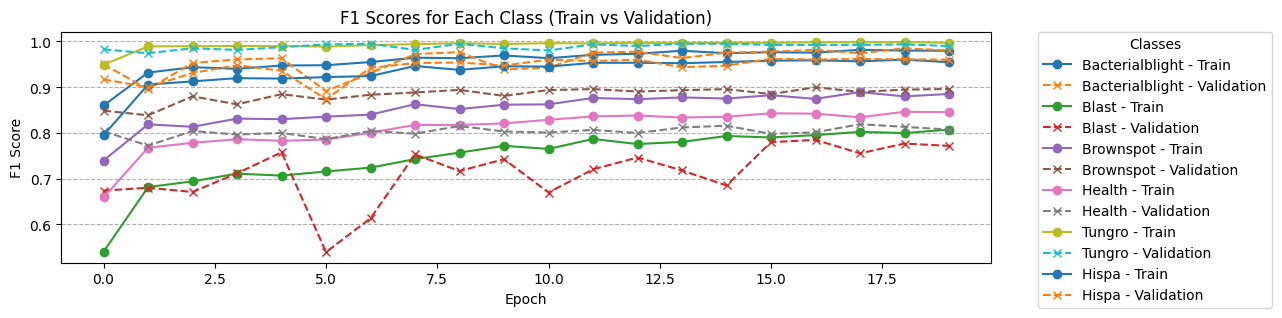

In [30]:
# Data visualization
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()
for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(DenseNet_best_history.history[met], color='blue', linestyle='-', marker='o', markersize=3)
    ax[i].plot(DenseNet_best_history.history['val_' + met], color='red', linestyle='-', marker='o', markersize=3)
    if i == 0:
        ax[i].legend(['train', 'val'])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].grid(axis='y', linestyle='--')

plt.suptitle('DenseNet Performance Metrics Over Epochs', fontsize=8)
plt.show()

# drew the f1 score of the train and val
class_names = ['Bacterialblight', 'Blast', 'Brownspot', 'Health', 'Tungro', 'Hispa']
# get the f1 score of the train and val
train_f1_scores = DenseNet_best_history.history['f1_score']
val_f1_scores = DenseNet_best_history.history['val_f1_score']

plt.figure(figsize=(12, 3))
# plot the f1 score of the train and val
for i, class_name in enumerate(class_names):
    plt.plot([epoch[i] for epoch in train_f1_scores], label=f"{class_name} - Train", marker='o', linestyle='-')
    plt.plot([epoch[i] for epoch in val_f1_scores], label=f"{class_name} - Validation", marker='x', linestyle='--')

plt.title("F1 Scores for Each Class (Train vs Validation)")
plt.xlabel("Epoch")
plt.legend(title="Classes", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel("F1 Score")
plt.grid(axis='y', linestyle='--')
plt.show()

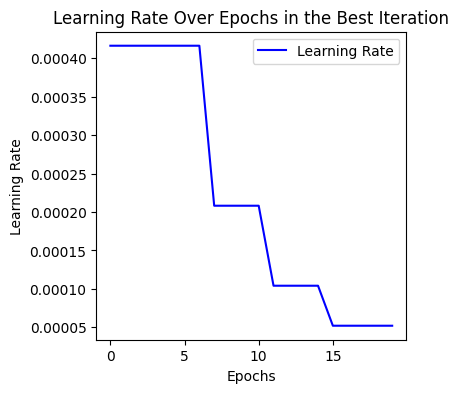

In [31]:
# print the learning rate during the training process
plt.figure(figsize=(4, 4))
plt.plot(DenseNet_best_history.history['lr'], label='Learning Rate', color='b')
plt.title('Learning Rate Over Epochs in the Best Iteration')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.legend()
plt.show()

MobileNet

In [32]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.models import Model
import tensorflow as tf
import tensorflow_addons as tfa
from bayes_opt import BayesianOptimization
from bayes_opt.logger import JSONLogger
from bayes_opt.event import Events

def build_mobilenet_model(dropout_rate, optimizer_choice, learning_rate, l1_reg, l2_reg, fc_units):
    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # To freeze the layer
    for layer in base_model.layers:
        layer.trainable = False
        
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(fc_units, activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg))(x)
    x = Dropout(dropout_rate)(x)
    predictions = Dense(6, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_choice == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
    else:
        optimizer = RMSprop(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, 
                  loss='binary_crossentropy', 
                  metrics=['accuracy', 
                           tf.keras.metrics.Precision(name='precision'), 
                           tf.keras.metrics.Recall(name='recall'),
                           tfa.metrics.F1Score(name='f1_score', threshold=0.5, num_classes=6)
                           ])
    return model

def fit_mobilenet(lr, batch_size_index, optimizer_index, dropout_rate, l1_reg, l2_reg, fc_units_index):
    tf.keras.backend.clear_session()

    batch_sizes = [8, 16, 32]
    optimizer_choices = ['adam', 'sgd', 'rmsprop']
    fc_units_choices = [128, 256, 512]

    batch_size = batch_sizes[int(batch_size_index)]
    optimizer_choice = optimizer_choices[int(optimizer_index)]
    fc_units = fc_units_choices[int(fc_units_index)]
    print(f'Current batch size is {batch_size} and fc_units is {fc_units}')

    model = build_mobilenet_model(dropout_rate=dropout_rate, optimizer_choice=optimizer_choice, learning_rate=lr, l1_reg=l1_reg, l2_reg=l2_reg, fc_units=fc_units)

    train_ds_local = change_batch_size(batch_size, train_ds)
    val_ds_local = change_batch_size(batch_size, val_ds)

    steps_per_epoch = max(1, TRAIN_IMG_COUNT // batch_size)
    validation_steps = max(1, VAL_IMG_COUNT // batch_size)

    MobileNet_history = model.fit(
        train_ds_local,
        steps_per_epoch=steps_per_epoch,
        epochs=15,
        validation_data=val_ds_local,
        validation_steps=validation_steps,
        callbacks=normal_callbacks
    )

    best_accuracy = max(MobileNet_history.history['val_accuracy'])
    return best_accuracy

pbounds = {
    'lr': (1e-6, 5e-4),
    'batch_size_index': (0, 3),
    'optimizer_index': (0, 3),
    'dropout_rate': (0.0, 0.5),
    'l1_reg': (2e-5, 2e-3),
    'l2_reg': (2e-5, 2e-3),
    'fc_units_index': (0, 3)
}

MobileNet_optimizer = BayesianOptimization(
    f=fit_mobilenet,
    pbounds=pbounds,
    random_state=42,
    verbose=2
)

logger = JSONLogger(path="./Stage_2_mobilenet_logs.json")
MobileNet_optimizer.subscribe(Events.OPTIMIZATION_STEP, logger)

MobileNet_optimizer.maximize(init_points=2, n_iter=10)

Current batch size is 16 and fc_units is 512
Epoch 1/15
450/450 [==============================] - 19s 38ms/step - loss: 14.1765 - accuracy: 0.7814 - precision: 0.8340 - recall: 0.7339 - f1_score: 0.7722 - val_loss: 8.3688 - val_accuracy: 0.9250 - val_precision: 0.9315 - val_recall: 0.9183 - val_f1_score: 0.9234 - lr: 7.8841e-05
Epoch 2/15
450/450 [==============================] - 16s 36ms/step - loss: 4.5102 - accuracy: 0.9186 - precision: 0.9308 - recall: 0.9049 - f1_score: 0.9163 - val_loss: 1.6769 - val_accuracy: 0.9358 - val_precision: 0.9395 - val_recall: 0.9321 - val_f1_score: 0.9355 - lr: 7.8841e-05
Epoch 3/15
450/450 [==============================] - 16s 36ms/step - loss: 0.7481 - accuracy: 0.9368 - precision: 0.9517 - recall: 0.9222 - f1_score: 0.9361 - val_loss: 0.2847 - val_accuracy: 0.9421 - val_precision: 0.9477 - val_recall: 0.9367 - val_f1_score: 0.9420 - lr: 7.8841e-05
Epoch 4/15
450/450 [==============================] - 16s 36ms/step - loss: 0.2421 - accuracy: 0.94

In [33]:
# Initialize variables to store the best result for MobileNet
best_iteration_mobilenet = None
best_target_mobilenet = float('-inf')

# Print all the results of the iterations for MobileNet
print("The result of all iterations of MobileNet:")
for i, res in enumerate(MobileNet_optimizer.res):
    params = res['params']
    readable_params = {
        'batch_size': batch_sizes[int(params['batch_size_index'])],
        'optimizer': optimizer_choices[int(params['optimizer_index'])],
        'fc_units': fc_units_choices[int(params['fc_units_index'])],
        'dropout_rate': params['dropout_rate'],
        'l1_reg': params['l1_reg'],
        'l2_reg': params['l2_reg'],
        'lr': params['lr']
    }
    print(f"Iteration {i+1}:")
    print(f"Target: {res['target']:.4f}")
    print("Parameters:")
    for key, value in readable_params.items():
        print(f"  {key}: {value}")
    print()

    # Update the best iteration result
    if res['target'] > best_target_mobilenet:
        best_target_mobilenet = res['target']
        best_iteration_mobilenet = (i+1, readable_params, best_target_mobilenet)

# Print the best result for MobileNet
if best_iteration_mobilenet:
    iteration_number, params, target = best_iteration_mobilenet
    print("The best result of MobileNet is:")
    print(f"Iteration {iteration_number}:")
    print(f"Target: {target:.4f}")
    print("Parameters:")
    for key, value in params.items():
        print(f"  {key}: {value}")

The result of all iterations of MobileNet:
Iteration 1:
Target: 0.9571
Parameters:
  batch_size: 8
  optimizer: adam
  fc_units: 512
  dropout_rate: 0.4753571532049581
  l1_reg: 0.0012053437987101325
  l2_reg: 0.0003289169080760243
  lr: 7.884126564776511e-05

Iteration 2:
Target: 0.9575
Parameters:
  batch_size: 16
  optimizer: adam
  fc_units: 512
  dropout_rate: 0.3005575058716044
  l1_reg: 6.075729870568885e-05
  l2_reg: 0.0019404215072807488
  lr: 0.00041638887775941047

Iteration 3:
Target: 0.9579
Parameters:
  batch_size: 16
  optimizer: adam
  fc_units: 512
  dropout_rate: 0.2575688367305503
  l1_reg: 9.070767907572332e-05
  l2_reg: 0.000743023444242497
  lr: 0.00024010550435032545

Iteration 4:
Target: 0.7837
Parameters:
  batch_size: 4
  optimizer: sgd
  fc_units: 512
  dropout_rate: 0.054484951089545486
  l1_reg: 0.0017028945554537567
  l2_reg: 0.0015086800971512004
  lr: 0.00014018970950181324

Iteration 5:
Target: 0.9525
Parameters:
  batch_size: 16
  optimizer: adam
  fc_

Epoch 1/20
449/450 [============================>.] - ETA: 0s - loss: 2.2670 - accuracy: 0.8460 - precision: 0.8694 - recall: 0.8268 - f1_score: 0.8456
Epoch 1: val_accuracy improved from -inf to 0.87833, saving model to Stage_2_model-MobileNet.weights.h5
450/450 [==============================] - 26s 54ms/step - loss: 2.2625 - accuracy: 0.8461 - precision: 0.8696 - recall: 0.8269 - f1_score: 0.8457 - val_loss: 0.2485 - val_accuracy: 0.8783 - val_precision: 0.8878 - val_recall: 0.8675 - val_f1_score: 0.8615 - lr: 4.2431e-04
Epoch 2/20
449/450 [============================>.] - ETA: 0s - loss: 0.2326 - accuracy: 0.9102 - precision: 0.9208 - recall: 0.8985 - f1_score: 0.9087
Epoch 2: val_accuracy improved from 0.87833 to 0.94708, saving model to Stage_2_model-MobileNet.weights.h5
450/450 [==============================] - 23s 52ms/step - loss: 0.2326 - accuracy: 0.9101 - precision: 0.9209 - recall: 0.8985 - f1_score: 0.9087 - val_loss: 0.1860 - val_accuracy: 0.9471 - val_precision: 0.949

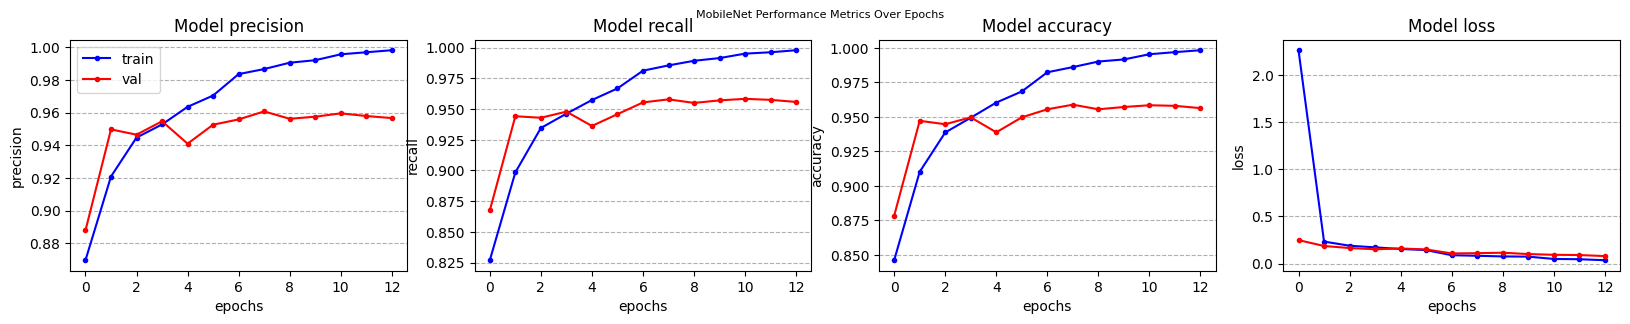

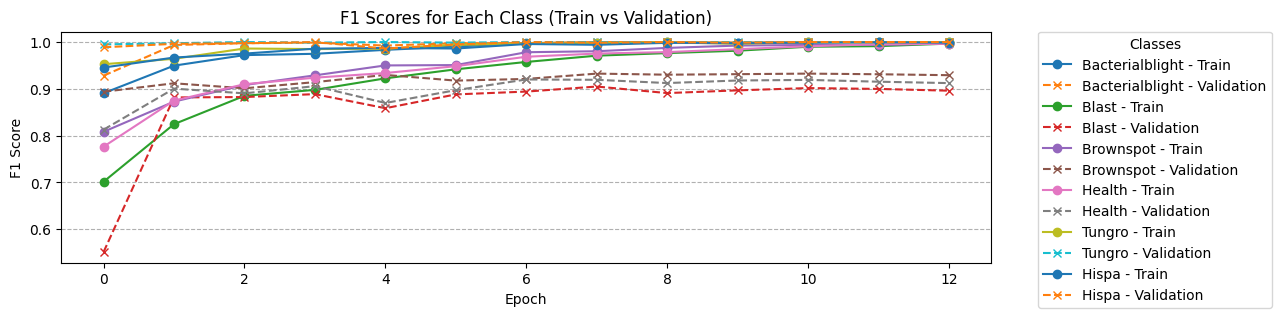

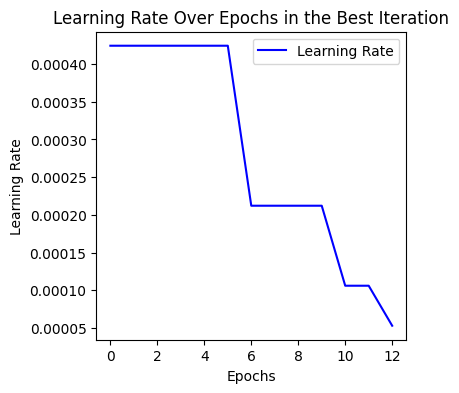

In [34]:
# MobileNet Callbacks
mobilenet_callbacks = [
    EarlyStopping(patience=5, verbose=1, restore_best_weights=True, monitor='val_accuracy'),
    ReduceLROnPlateau(factor=0.5, patience=2, min_lr=1e-8, verbose=1, monitor='val_accuracy'),
    ModelCheckpoint('Stage_2_model-MobileNet.weights.h5', verbose=1, save_best_only=True, monitor='val_accuracy'),
]

# Get the best parameters in MobileNet
MobileNet_best_params = MobileNet_optimizer.max['params']

best_lr = MobileNet_best_params['lr']
best_batch_size_index = int(MobileNet_best_params['batch_size_index'])
best_optimizer_index = int(MobileNet_best_params['optimizer_index'])
best_dropout_rate = MobileNet_best_params['dropout_rate']
best_l1_reg = MobileNet_best_params['l1_reg']
best_l2_reg = MobileNet_best_params['l2_reg']
best_fc_units_index = int(MobileNet_best_params['fc_units_index'])

# Get the actual batch size and optimizer choice based on the index
best_batch_size = batch_sizes[best_batch_size_index]
best_optimizer_choice = optimizer_choices[best_optimizer_index]
best_fc_units = fc_units_choices[best_fc_units_index]

tf.keras.backend.clear_session()

# Build the model with the best hyperparameters
best_MobileNet_model = build_mobilenet_model(
    dropout_rate=best_dropout_rate,
    optimizer_choice=best_optimizer_choice,
    learning_rate=best_lr,
    l1_reg=best_l1_reg,
    l2_reg=best_l2_reg,
    fc_units=best_fc_units
)

# Prepare the datasets
train_ds_local = change_batch_size(best_batch_size, train_ds)
val_ds_local = change_batch_size(best_batch_size, val_ds)

# Train the model with the best hyperparameters
MobileNet_best_history = best_MobileNet_model.fit(
    train_ds_local,
    epochs=20,
    validation_data=val_ds_local,
    steps_per_epoch=TRAIN_IMG_COUNT // best_batch_size,
    validation_steps=VAL_IMG_COUNT // best_batch_size,
    callbacks=mobilenet_callbacks
)

# Print the new training result
new_best_accuracy = max(MobileNet_best_history.history['val_accuracy'])
print("The new best accuracy in MobileNet is:", new_best_accuracy)

# Data visualization
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()
for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(MobileNet_best_history.history[met], color='blue', linestyle='-', marker='o', markersize=3)
    ax[i].plot(MobileNet_best_history.history['val_' + met], color='red', linestyle='-', marker='o', markersize=3)
    if i == 0:
        ax[i].legend(['train', 'val'])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].grid(axis='y', linestyle='--')

plt.suptitle('MobileNet Performance Metrics Over Epochs', fontsize=8)
plt.show()

# drew the f1 score of the train and val
class_names = ['Bacterialblight', 'Blast', 'Brownspot', 'Health', 'Tungro', 'Hispa']
# get the f1 score of the train and val
train_f1_scores = MobileNet_best_history.history['f1_score']
val_f1_scores = MobileNet_best_history.history['val_f1_score']

plt.figure(figsize=(12, 3))
# plot the f1 score of the train and val
for i, class_name in enumerate(class_names):
    plt.plot([epoch[i] for epoch in train_f1_scores], label=f"{class_name} - Train", marker='o', linestyle='-')
    plt.plot([epoch[i] for epoch in val_f1_scores], label=f"{class_name} - Validation", marker='x', linestyle='--')

plt.title("F1 Scores for Each Class (Train vs Validation)")
plt.xlabel("Epoch")
plt.legend(title="Classes", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel("F1 Score")
plt.grid(axis='y', linestyle='--')
plt.show()

# Print the learning rate during the training process
plt.figure(figsize=(4, 4))
plt.plot(MobileNet_best_history.history['lr'], label='Learning Rate', color='b')
plt.title('Learning Rate Over Epochs in the Best Iteration')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.legend()
plt.show()

ResNet

In [35]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.models import Model
import tensorflow as tf
import tensorflow_addons as tfa
from bayes_opt import BayesianOptimization
from bayes_opt.logger import JSONLogger
from bayes_opt.event import Events

def build_resnet_model(dropout_rate, optimizer_choice, learning_rate, l1_reg, l2_reg, fc_units):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    # To freeze the layer
    # for layer in base_model.layers:
    #     layer.trainable = False
    
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(fc_units, activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg))(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(fc_units, activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg))(x)
    x = Dropout(dropout_rate)(x)
    predictions = Dense(6, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_choice == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
    else:
        optimizer = RMSprop(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy', 
                           tf.keras.metrics.Precision(name='precision'), 
                           tf.keras.metrics.Recall(name='recall'),
                           tfa.metrics.F1Score(name='f1_score', threshold=0.5, num_classes=6)
                           ])
    return model

def fit_resnet(lr, batch_size_index, optimizer_index, dropout_rate, l1_reg, l2_reg, fc_units_index):
    tf.keras.backend.clear_session()

    batch_sizes = [8, 16, 32]
    optimizer_choices = ['adam', 'sgd', 'rmsprop']
    fc_units_choices = [64, 128, 256]

    batch_size = batch_sizes[int(batch_size_index)]
    optimizer_choice = optimizer_choices[int(optimizer_index)]
    fc_units = fc_units_choices[int(fc_units_index)]
    print(f'Current batch size is {batch_size} and fc_units is {fc_units}')

    model = build_resnet_model(dropout_rate=dropout_rate, optimizer_choice=optimizer_choice, learning_rate=lr, l1_reg=l1_reg, l2_reg=l2_reg, fc_units=fc_units)

    train_ds_local = change_batch_size(batch_size, train_ds)
    val_ds_local = change_batch_size(batch_size, val_ds)

    steps_per_epoch = max(1, TRAIN_IMG_COUNT // batch_size)
    validation_steps = max(1, VAL_IMG_COUNT // batch_size)

    ResNet_history = model.fit(
        train_ds_local,
        steps_per_epoch=steps_per_epoch,
        epochs=10,
        validation_data=val_ds_local,
        validation_steps=validation_steps,
        callbacks=normal_callbacks
    )

    best_accuracy = max(ResNet_history.history['val_accuracy'])
    return best_accuracy

pbounds = {
    'lr': (1e-6, 5e-4),
    'batch_size_index': (0, 3),
    'optimizer_index': (0, 3),
    'dropout_rate': (0.0, 0.5),
    'l1_reg': (1e-3, 1e-1),
    'l2_reg': (1e-3, 1e-1),
    'fc_units_index': (0, 3)
}

ResNet_optimizer = BayesianOptimization(
    f=fit_resnet,
    pbounds=pbounds,
    random_state=42,
    verbose=2
)

logger = JSONLogger(path="./Stage_2_resnet_logs.json")
ResNet_optimizer.subscribe(Events.OPTIMIZATION_STEP, logger)

ResNet_optimizer.maximize(init_points=2, n_iter=10)

Current batch size is 16 and fc_units is 256
Epoch 1/10
450/450 [==============================] - 42s 86ms/step - loss: 542.3989 - accuracy: 0.7143 - precision: 0.8646 - recall: 0.5018 - f1_score: 0.6193 - val_loss: 190.6353 - val_accuracy: 0.1667 - val_precision: 0.1667 - val_recall: 0.1667 - val_f1_score: 0.0476 - lr: 7.8841e-05
Epoch 2/10
450/450 [==============================] - 39s 87ms/step - loss: 75.5883 - accuracy: 0.7510 - precision: 0.9698 - recall: 0.1069 - f1_score: 0.1872 - val_loss: 30.4195 - val_accuracy: 0.1900 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00 - lr: 7.8841e-05
Epoch 3/10
450/450 [==============================] - 39s 86ms/step - loss: 12.7584 - accuracy: 0.3526 - precision: 1.0000 - recall: 6.9444e-04 - f1_score: 0.0014 - val_loss: 2.4878 - val_accuracy: 0.3317 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00 - lr: 7.8841e-05
Epoch 4/10
450/450 [==============================] - 38s 86ms/st

In [36]:
# Initialize variables to store the best result for ResNet
best_iteration_resnet = None
best_target_resnet = float('-inf')
batch_sizes = [8, 16, 32]
optimizer_choices = ['adam', 'sgd', 'rmsprop']
fc_units_choices = [64, 128, 256]

# Print all the results of the iterations for ResNet
print("The result of all iterations of ResNet:")
for i, res in enumerate(ResNet_optimizer.res):
    params = res['params']
    readable_params = {
        'batch_size': batch_sizes[int(params['batch_size_index'])],
        'optimizer': optimizer_choices[int(params['optimizer_index'])],
        'fc_units': fc_units_choices[int(params['fc_units_index'])],
        'dropout_rate': params['dropout_rate'],
        'l1_reg': params['l1_reg'],
        'l2_reg': params['l2_reg'],
        'lr': params['lr']
    }
    print(f"Iteration {i+1}:")
    print(f"Target: {res['target']:.4f}")
    print("Parameters:")
    for key, value in readable_params.items():
        print(f"  {key}: {value}")
    print()

    # Update the best iteration result
    if res['target'] > best_target_resnet:
        best_target_resnet = res['target']
        best_iteration_resnet = (i+1, readable_params, best_target_resnet)

# Print the best result for ResNet
if best_iteration_resnet:
    iteration_number, params, target = best_iteration_resnet
    print("The best result of ResNet is:")
    print(f"Iteration {iteration_number}:")
    print(f"Target: {target:.4f}")
    print("Parameters:")
    for key, value in params.items():
        print(f"  {key}: {value}")

The result of all iterations of ResNet:
Iteration 1:
Target: 0.3317
Parameters:
  batch_size: 16
  optimizer: adam
  fc_units: 256
  dropout_rate: 0.4753571532049581
  l1_reg: 0.06026718993550663
  l2_reg: 0.016445845403801215
  lr: 7.884126564776511e-05

Iteration 2:
Target: 0.9479
Parameters:
  batch_size: 32
  optimizer: adam
  fc_units: 256
  dropout_rate: 0.3005575058716044
  l1_reg: 0.0030378649352844423
  l2_reg: 0.09702107536403744
  lr: 0.00041638887775941047

Iteration 3:
Target: 0.9458
Parameters:
  batch_size: 32
  optimizer: adam
  fc_units: 256
  dropout_rate: 0.2575688367305503
  l1_reg: 0.004535383953786166
  l2_reg: 0.03715117221212484
  lr: 0.00024010550435032545

Iteration 4:
Target: 0.6254
Parameters:
  batch_size: 32
  optimizer: sgd
  fc_units: 256
  dropout_rate: 0.12237139940033764
  l1_reg: 0.04269115429130443
  l2_reg: 0.024330994439572262
  lr: 4.190585777474495e-05

Iteration 5:
Target: 0.9588
Parameters:
  batch_size: 32
  optimizer: adam
  fc_units: 128
  

Epoch 1/12
225/225 [==============================] - ETA: 0s - loss: 79.8679 - accuracy: 0.8364 - precision: 0.9357 - recall: 0.7314 - f1_score: 0.8102
Epoch 1: val_accuracy improved from -inf to 0.16667, saving model to Stage_2_model-ResNet.weights.h5
225/225 [==============================] - 35s 142ms/step - loss: 79.8679 - accuracy: 0.8364 - precision: 0.9357 - recall: 0.7314 - f1_score: 0.8102 - val_loss: 68.1348 - val_accuracy: 0.1667 - val_precision: 0.1667 - val_recall: 0.1667 - val_f1_score: 0.0476 - lr: 6.9253e-05
Epoch 2/12
225/225 [==============================] - ETA: 0s - loss: 41.1462 - accuracy: 0.9386 - precision: 0.9576 - recall: 0.9151 - f1_score: 0.9349
Epoch 2: val_accuracy did not improve from 0.16667
225/225 [==============================] - 31s 137ms/step - loss: 41.1462 - accuracy: 0.9386 - precision: 0.9576 - recall: 0.9151 - f1_score: 0.9349 - val_loss: 31.9485 - val_accuracy: 0.1667 - val_precision: 0.1667 - val_recall: 0.1667 - val_f1_score: 0.0476 - lr:

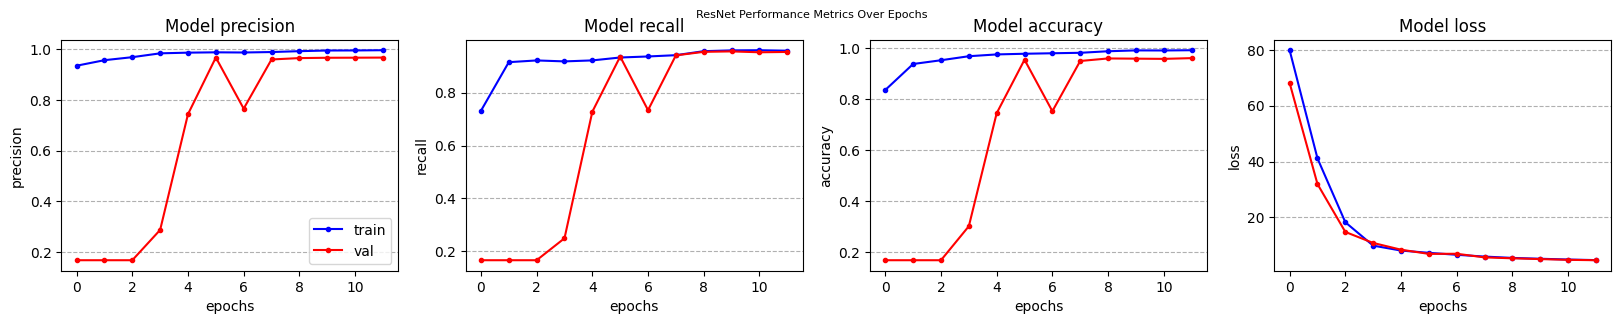

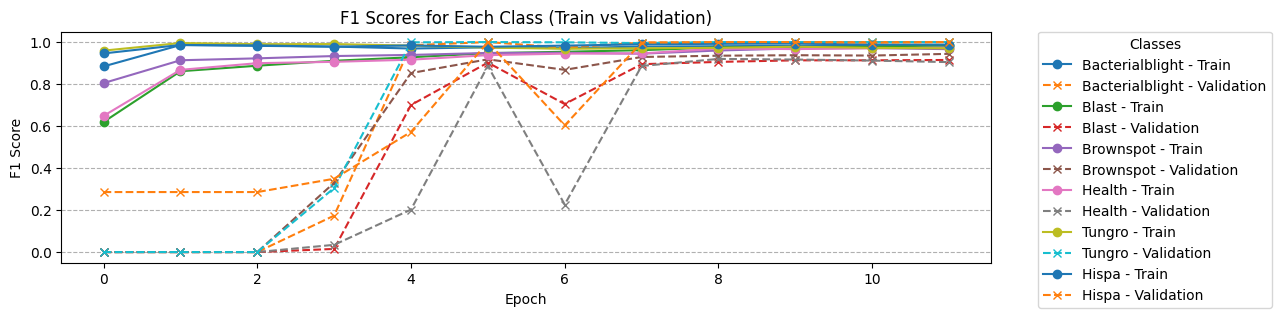

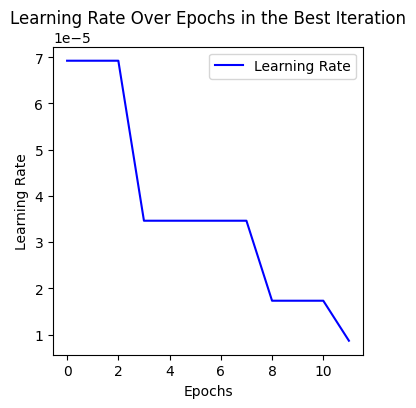

In [37]:
# ResNet Callbacks
resnet_callbacks = [
    EarlyStopping(patience=5, verbose=1, restore_best_weights=True, monitor='val_accuracy'),
    ReduceLROnPlateau(factor=0.5, patience=2, min_lr=1e-8, verbose=1, monitor='val_accuracy'),
    ModelCheckpoint('Stage_2_model-ResNet.weights.h5', verbose=1, save_best_only=True, monitor='val_accuracy'),
]


# Get the best parameters in ResNet
ResNet_best_params = ResNet_optimizer.max['params']

best_lr = ResNet_best_params['lr']
best_batch_size_index = int(ResNet_best_params['batch_size_index'])
best_optimizer_index = int(ResNet_best_params['optimizer_index'])
best_dropout_rate = ResNet_best_params['dropout_rate']
best_l1_reg = ResNet_best_params['l1_reg']
best_l2_reg = ResNet_best_params['l2_reg']
best_fc_units_index = int(ResNet_best_params['fc_units_index'])

# Get the actual batch size and optimizer choice based on the index
best_batch_size = batch_sizes[best_batch_size_index]
best_optimizer_choice = optimizer_choices[best_optimizer_index]
best_fc_units = fc_units_choices[best_fc_units_index]

tf.keras.backend.clear_session()

# Build the model with the best hyperparameters
best_ResNet_model = build_resnet_model(
    dropout_rate=best_dropout_rate,
    optimizer_choice=best_optimizer_choice,
    learning_rate=best_lr,
    l1_reg=best_l1_reg,
    l2_reg=best_l2_reg,
    fc_units=best_fc_units
)

# Prepare the datasets
train_ds_local = change_batch_size(best_batch_size, train_ds)
val_ds_local = change_batch_size(best_batch_size, val_ds)

# Train the model with the best hyperparameters
ResNet_best_history = best_ResNet_model.fit(
    train_ds_local,
    epochs=12,
    validation_data=val_ds_local,
    steps_per_epoch=TRAIN_IMG_COUNT // best_batch_size,
    validation_steps=VAL_IMG_COUNT // best_batch_size,
    callbacks=resnet_callbacks
)

# Print the new training result
new_best_accuracy = max(ResNet_best_history.history['val_accuracy'])
print("The new best accuracy in ResNet is:", new_best_accuracy)

# Plot the training and validation results each epoch
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(ResNet_best_history.history[met], color='blue', linestyle='-', marker='o', markersize=3)
    ax[i].plot(ResNet_best_history.history['val_' + met], color='red', linestyle='-', marker='o', markersize=3)
    if i == 0:
        ax[i].legend(['train', 'val'])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].grid(axis='y', linestyle='--')

plt.suptitle('ResNet Performance Metrics Over Epochs', fontsize=8)
plt.show()

# drew the f1 score of the train and val
class_names = ['Bacterialblight', 'Blast', 'Brownspot', 'Health', 'Tungro', "Hispa"]
# get the f1 score of the train and val
train_f1_scores = ResNet_best_history.history['f1_score']
val_f1_scores = ResNet_best_history.history['val_f1_score']

plt.figure(figsize=(12, 3))
# plot the f1 score of the train and val
for i, class_name in enumerate(class_names):
    plt.plot([epoch[i] for epoch in train_f1_scores], label=f"{class_name} - Train", marker='o', linestyle='-')
    plt.plot([epoch[i] for epoch in val_f1_scores], label=f"{class_name} - Validation", marker='x', linestyle='--')

plt.title("F1 Scores for Each Class (Train vs Validation)")
plt.xlabel("Epoch")
plt.legend(title="Classes", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel("F1 Score")
plt.grid(axis='y', linestyle='--')
plt.show()

# Print the learning rate during the training process
plt.figure(figsize=(4, 4))
plt.plot(ResNet_best_history.history['lr'], label='Learning Rate', color='b')
plt.title('Learning Rate Over Epochs in the Best Iteration')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.legend()
plt.show()

###  EfficientNetB0

In [38]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.models import Model
import tensorflow as tf
import tensorflow_addons as tfa
from bayes_opt import BayesianOptimization
from bayes_opt.logger import JSONLogger
from bayes_opt.event import Events

def build_EfficientNetB0_model(dropout_rate, optimizer_choice, learning_rate, l1_reg, l2_reg, fc_units):
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    # To freeze the layer
    # for layer in base_model.layers:
    #     layer.trainable = False
    
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(fc_units, activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg))(x)
    x = Dropout(dropout_rate)(x)
    predictions = Dense(6, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_choice == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
    else:
        optimizer = RMSprop(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy', 
                           tf.keras.metrics.Precision(name='precision'), 
                           tf.keras.metrics.Recall(name='recall'),
                           tfa.metrics.F1Score(name='f1_score', threshold=0.5, num_classes=6)
                           ])
    return model

def fit_EfficientNetB0(lr, batch_size_index, optimizer_index, dropout_rate, l1_reg, l2_reg, fc_units_index):
    tf.keras.backend.clear_session()

    batch_sizes = [8, 16, 32]
    optimizer_choices = ['adam', 'sgd', 'rmsprop']
    fc_units_choices = [64, 128, 256]

    batch_size = batch_sizes[int(batch_size_index)]
    optimizer_choice = optimizer_choices[int(optimizer_index)]
    fc_units = fc_units_choices[int(fc_units_index)]
    print(f'Current batch size is {batch_size} and fc_units is {fc_units}')

    model = build_EfficientNetB0_model(dropout_rate=dropout_rate, optimizer_choice=optimizer_choice, learning_rate=lr, l1_reg=l1_reg, l2_reg=l2_reg, fc_units=fc_units)

    train_ds_local = change_batch_size(batch_size, train_ds)
    val_ds_local = change_batch_size(batch_size, val_ds)

    steps_per_epoch = max(1, TRAIN_IMG_COUNT // batch_size)
    validation_steps = max(1, VAL_IMG_COUNT // batch_size)

    EfficientNetB0_history = model.fit(
        train_ds_local,
        steps_per_epoch=steps_per_epoch,
        epochs=10,
        validation_data=val_ds_local,
        validation_steps=validation_steps,
        callbacks=normal_callbacks
    )

    best_accuracy = max(EfficientNetB0_history.history['val_accuracy'])
    return best_accuracy

pbounds = {
    'lr': (1e-6, 5e-4),
    'batch_size_index': (0, 3),
    'optimizer_index': (0, 3),
    'dropout_rate': (0.3, 0.6),
    'l1_reg': (1e-2, 1e-1),
    'l2_reg': (1e-2, 1e-1),
    'fc_units_index': (0, 3)
}

EfficientNetB0_optimizer = BayesianOptimization(
    f=fit_EfficientNetB0,
    pbounds=pbounds,
    random_state=42,
    verbose=2
)

logger = JSONLogger(path="./Stage_2_efficientnetb0_logs.json")
EfficientNetB0_optimizer.subscribe(Events.OPTIMIZATION_STEP, logger)

EfficientNetB0_optimizer.maximize(init_points=2, n_iter=10)

Current batch size is 16 and fc_units is 256
Epoch 1/10
450/450 [==============================] - 40s 80ms/step - loss: 360.7273 - accuracy: 0.6290 - precision: 0.9112 - recall: 0.3007 - f1_score: 0.4129 - val_loss: 127.8492 - val_accuracy: 0.1671 - val_precision: 0.4159 - val_recall: 0.0917 - val_f1_score: 0.0789 - lr: 7.8841e-05
Epoch 2/10
450/450 [==============================] - 35s 79ms/step - loss: 34.6373 - accuracy: 0.7415 - precision: 0.9566 - recall: 0.1926 - f1_score: 0.2926 - val_loss: 2.1063 - val_accuracy: 0.4146 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00 - lr: 7.8841e-05
Epoch 3/10
450/450 [==============================] - 35s 78ms/step - loss: 2.0059 - accuracy: 0.5553 - precision: 0.9775 - recall: 0.0301 - f1_score: 0.0541 - val_loss: 2.1834 - val_accuracy: 0.3429 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00 - lr: 7.8841e-05
Epoch 4/10
450/450 [==============================] - ETA: 0s - loss: 1

In [39]:
# Define the mapping table
batch_sizes = [8, 16, 32]
optimizer_choices = ['adam', 'sgd', 'rmsprop']
fc_units_choices = [64, 128, 256]

# Initialize variables to store the best result for EfficientNetB0
best_iteration_efficientnetb0 = None
best_target_efficientnetb0 = float('-inf')

# Print all the results of the iterations for EfficientNetB0
print("The result of all iterations of EfficientNetB0:")
for i, res in enumerate(EfficientNetB0_optimizer.res):
    params = res['params']
    readable_params = {
        'batch_size': batch_sizes[int(params['batch_size_index'])],
        'optimizer': optimizer_choices[int(params['optimizer_index'])],
        'fc_units': fc_units_choices[int(params['fc_units_index'])],
        'dropout_rate': params['dropout_rate'],
        'l1_reg': params['l1_reg'],
        'l2_reg': params['l2_reg'],
        'lr': params['lr']
    }
    print(f"Iteration {i+1}:")
    print(f"Target: {res['target']:.4f}")
    print("Parameters:")
    for key, value in readable_params.items():
        print(f"  {key}: {value}")
    print()

    # Update the best iteration result
    if res['target'] > best_target_efficientnetb0:
        best_target_efficientnetb0 = res['target']
        best_iteration_efficientnetb0 = (i+1, readable_params, best_target_efficientnetb0)

# Print the best result for EfficientNetB0
if best_iteration_efficientnetb0:
    iteration_number, params, target = best_iteration_efficientnetb0
    print("The best result of EfficientNetB0 is:")
    print(f"Iteration {iteration_number}:")
    print(f"Target: {target:.4f}")
    print("Parameters:")
    for key, value in params.items():
        print(f"  {key}: {value}")

The result of all iterations of EfficientNetB0:
Iteration 1:
Target: 0.4146
Parameters:
  batch_size: 16
  optimizer: adam
  fc_units: 256
  dropout_rate: 0.5852142919229748
  l1_reg: 0.0638792635777333
  l2_reg: 0.02404167763981929
  lr: 7.884126564776511e-05

Iteration 2:
Target: 0.3250
Parameters:
  batch_size: 32
  optimizer: adam
  fc_units: 256
  dropout_rate: 0.4803345035229626
  l1_reg: 0.011852604486622221
  l2_reg: 0.0972918866945795
  lr: 0.00041638887775941047

Iteration 3:
Target: 0.5267
Parameters:
  batch_size: 16
  optimizer: adam
  fc_units: 256
  dropout_rate: 0.5526846296244647
  l1_reg: 0.09929362917070433
  l2_reg: 0.06521632144457613
  lr: 0.00023216504559285683

Iteration 4:
Target: 0.6546
Parameters:
  batch_size: 8
  optimizer: sgd
  fc_units: 256
  dropout_rate: 0.33269097065372727
  l1_reg: 0.08649520706607985
  l2_reg: 0.07766727714323637
  lr: 0.00014018970950181324

Iteration 5:
Target: 0.5658
Parameters:
  batch_size: 16
  optimizer: rmsprop
  fc_units: 2

Epoch 1/12
225/225 [==============================] - ETA: 0s - loss: 57.1594 - accuracy: 0.7103 - precision: 0.9076 - recall: 0.4406 - f1_score: 0.5646
Epoch 1: val_accuracy improved from -inf to 0.14750, saving model to Stage_2_model-EfficientNetB0.h5
225/225 [==============================] - 33s 129ms/step - loss: 57.1594 - accuracy: 0.7103 - precision: 0.9076 - recall: 0.4406 - f1_score: 0.5646 - val_loss: 43.8937 - val_accuracy: 0.1475 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00 - lr: 6.9253e-05
Epoch 2/12
225/225 [==============================] - ETA: 0s - loss: 31.3718 - accuracy: 0.8710 - precision: 0.9304 - recall: 0.7978 - f1_score: 0.8505
Epoch 2: val_accuracy improved from 0.14750 to 0.17667, saving model to Stage_2_model-EfficientNetB0.h5
225/225 [==============================] - 28s 125ms/step - loss: 31.3718 - accuracy: 0.8710 - precision: 0.9304 - recall: 0.7978 - f1_score: 0.8505 - val_loss: 22.9129 - val_accuracy: 0.1767 - val_pr

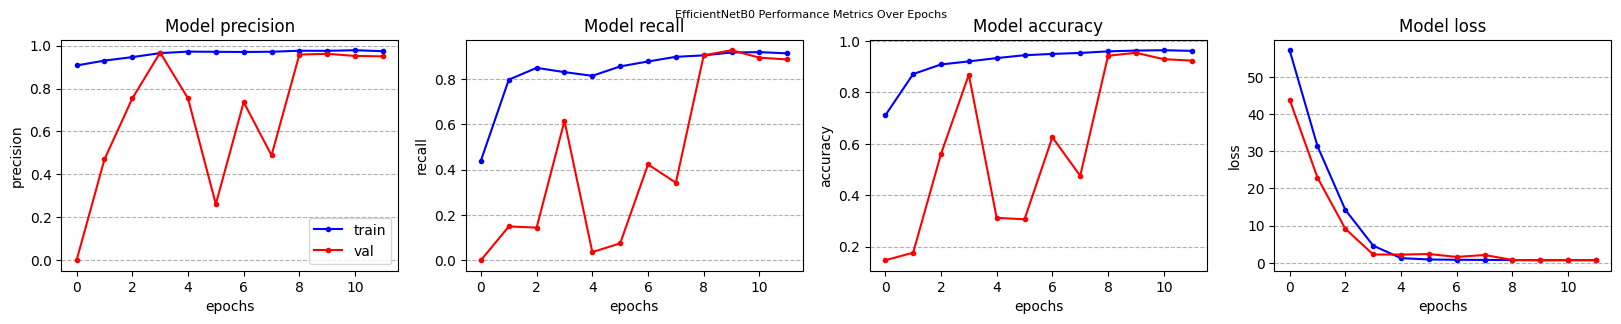

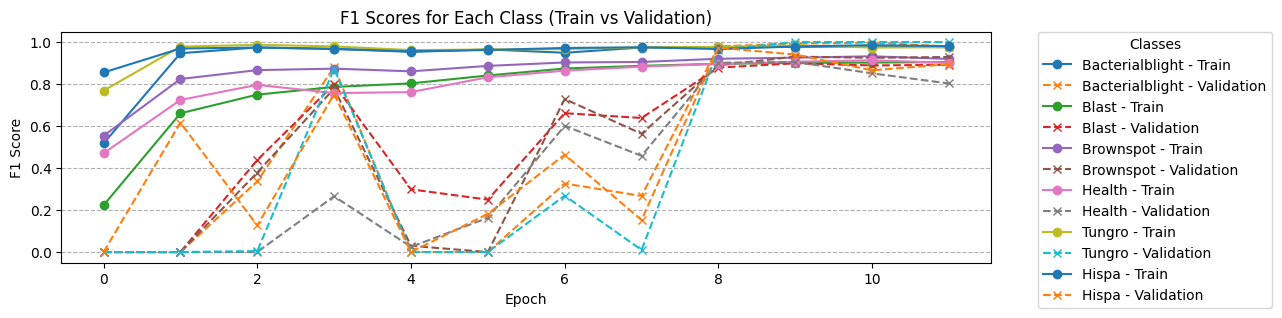

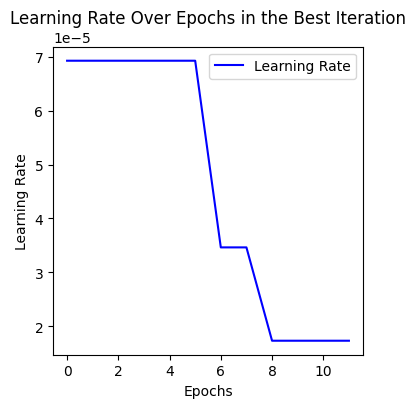

In [40]:
# EfficientNetB0 Callbacks
efficientnetb0_callbacks = [
    EarlyStopping(patience=5, verbose=1, restore_best_weights=True, monitor='val_accuracy'),
    ReduceLROnPlateau(factor=0.5, patience=2, min_lr=1e-8, verbose=1, monitor='val_accuracy'),
    ModelCheckpoint('Stage_2_model-EfficientNetB0.h5', verbose=1, save_best_only=True, monitor='val_accuracy', save_weights_only=True),
]

# Get the best parameters in EfficientNetB0
EfficientNetB0_best_params = EfficientNetB0_optimizer.max['params']

best_lr_efficientnetb0 = EfficientNetB0_best_params['lr']
best_batch_size_index = int(EfficientNetB0_best_params['batch_size_index'])
best_optimizer_index = int(EfficientNetB0_best_params['optimizer_index'])
best_dropout_rate_efficientnetb0 = EfficientNetB0_best_params['dropout_rate']
best_l1_reg_efficientnetb0 = EfficientNetB0_best_params['l1_reg']
best_l2_reg_efficientnetb0 = EfficientNetB0_best_params['l2_reg']
best_fc_units_index = int(EfficientNetB0_best_params['fc_units_index'])

# Get the actual batch size and optimizer choice based on the index
best_batch_size_efficientnetb0 = batch_sizes[best_batch_size_index]
best_optimizer_choice_efficientnetb0 = optimizer_choices[best_optimizer_index]
best_fc_units_efficientnetb0 = fc_units_choices[best_fc_units_index]

tf.keras.backend.clear_session()

# Build the model with the best hyperparameters
best_EfficientNetB0_model = build_EfficientNetB0_model(
    dropout_rate=best_dropout_rate,
    optimizer_choice=best_optimizer_choice,
    learning_rate=best_lr,
    l1_reg=best_l1_reg,
    l2_reg=best_l2_reg,
    fc_units=best_fc_units
)

# Prepare the datasets
train_ds_local = change_batch_size(best_batch_size, train_ds)
val_ds_local = change_batch_size(best_batch_size, val_ds)

# Train the model with the best hyperparameters
EfficientNetB0_best_history = best_EfficientNetB0_model.fit(
    train_ds_local,
    epochs=12,
    validation_data=val_ds_local,
    steps_per_epoch=TRAIN_IMG_COUNT // best_batch_size,
    validation_steps=VAL_IMG_COUNT // best_batch_size,
    callbacks=efficientnetb0_callbacks
)

# Print the new training result
new_best_accuracy = max(EfficientNetB0_best_history.history['val_accuracy'])
print("The new best accuracy in EfficientNetB0 is:", new_best_accuracy)

# Data visualization
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()
for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(EfficientNetB0_best_history.history[met], color='blue', linestyle='-', marker='o', markersize=3)
    ax[i].plot(EfficientNetB0_best_history.history['val_' + met], color='red', linestyle='-', marker='o', markersize=3)
    if i == 0:
        ax[i].legend(['train', 'val'])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].grid(axis='y', linestyle='--')

plt.suptitle('EfficientNetB0 Performance Metrics Over Epochs', fontsize=8)
plt.show()

# drew the f1 score of the train and val
class_names = ['Bacterialblight', 'Blast', 'Brownspot', 'Health', 'Tungro', 'Hispa']
# get the f1 score of the train and val
train_f1_scores = EfficientNetB0_best_history.history['f1_score']
val_f1_scores = EfficientNetB0_best_history.history['val_f1_score']

plt.figure(figsize=(12, 3))
# plot the f1 score of the train and val
for i, class_name in enumerate(class_names):
    plt.plot([epoch[i] for epoch in train_f1_scores], label=f"{class_name} - Train", marker='o', linestyle='-')
    plt.plot([epoch[i] for epoch in val_f1_scores], label=f"{class_name} - Validation", marker='x', linestyle='--')

plt.title("F1 Scores for Each Class (Train vs Validation)")
plt.xlabel("Epoch")
plt.legend(title="Classes", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel("F1 Score")
plt.grid(axis='y', linestyle='--')
plt.show()

# Print the learning rate during the training process
plt.figure(figsize=(4, 4))
plt.plot(EfficientNetB0_best_history.history['lr'], label='Learning Rate', color='b')
plt.title('Learning Rate Over Epochs in the Best Iteration')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.legend()
plt.show()

4. Compare the performance of the best epoch of the these models

In [41]:
from tensorflow.keras.models import load_model

def evaluate_model(model_type, optimizer, model_file_name, train_ds, val_ds, train_img_count, val_img_count):
    # Get the best parameters from the optimizer
    best_params = optimizer.max['params']
    best_batch_size_index = int(best_params['batch_size_index'])

    # Define the mapping of batch size
    batch_sizes = [8, 16, 32]
    best_batch_size = batch_sizes[best_batch_size_index]

    # Load the best model
    best_model = load_model(model_file_name)

    # Adjust the dataset batch size
    train_ds_local = change_batch_size(best_batch_size, train_ds)
    val_ds_local = change_batch_size(best_batch_size, val_ds)

    # Evaluate the model's performance on the training and validation sets
    print(f'{model_type} Train result:')
    train_results = best_model.evaluate(train_ds_local, steps=train_img_count // best_batch_size)
    print(f'{model_type} Validation result:')
    val_results = best_model.evaluate(val_ds_local, steps=val_img_count // best_batch_size)

    # Print the model's results
    print(f"Best {model_type} model performance:")
    print(f"Training set: Loss = {train_results[0]:.4f}, Accuracy = {train_results[1]:.4f}")
    print(f"Validation set: Loss = {val_results[0]:.4f}, Accuracy = {val_results[1]:.4f}")

    # Print the model summary
    best_model.summary()
    return best_batch_size, best_model

4.1 VGG16

In [42]:
best_batch_size_VGG16, best_VGGNet_model = evaluate_model(
    model_type='VGG16',
    optimizer=VGG16_optimizer,
    model_file_name='Stage_2_model-VGGNet.weights.h5',
    train_ds=train_ds,
    val_ds=val_ds,
    train_img_count=TRAIN_IMG_COUNT,
    val_img_count=VAL_IMG_COUNT
)

VGG16 Train result:
450/450 [==============================] - 11s 24ms/step - loss: 3.4658 - accuracy: 0.8982 - precision: 0.9229 - recall: 0.8679 - f1_score: 0.8918
VGG16 Validation result:
150/150 [==============================] - 4s 24ms/step - loss: 3.5874 - accuracy: 0.8492 - precision: 0.8786 - recall: 0.8083 - f1_score: 0.8362
Best VGG16 model performance:
Training set: Loss = 3.4658, Accuracy = 0.8982
Validation set: Loss = 3.5874, Accuracy = 0.8492
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                           

4.2 DenseNet

In [43]:
best_batch_size_DenseNet, best_DenseNet_model = evaluate_model(
    model_type='DenseNet',
    optimizer=DenseNet_optimizer,
    model_file_name='Stage_2_model-DenseNet.weights.h5',
    train_ds=train_ds,
    val_ds=val_ds,
    train_img_count=TRAIN_IMG_COUNT,
    val_img_count=VAL_IMG_COUNT
)

DenseNet Train result:
225/225 [==============================] - 12s 48ms/step - loss: 0.1217 - accuracy: 0.9197 - precision: 0.9317 - recall: 0.9076 - f1_score: 0.9184
DenseNet Validation result:
75/75 [==============================] - 4s 47ms/step - loss: 0.1308 - accuracy: 0.9050 - precision: 0.9204 - recall: 0.8913 - f1_score: 0.9042
Best DenseNet model performance:
Training set: Loss = 0.1217, Accuracy = 0.9197
Validation set: Loss = 0.1308, Accuracy = 0.9050
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (Ze

MobileNet

In [44]:
# Evaluate MobileNet
best_batch_size_MobileNet, best_MobileNet_model = evaluate_model(
    model_type='MobileNet',
    optimizer=MobileNet_optimizer,
    model_file_name='Stage_2_model-MobileNet.weights.h5',
    train_ds=train_ds,
    val_ds=val_ds,
    train_img_count=TRAIN_IMG_COUNT,
    val_img_count=VAL_IMG_COUNT
)

MobileNet Train result:
225/225 [==============================] - 4s 16ms/step - loss: 0.0683 - accuracy: 0.9940 - precision: 0.9943 - recall: 0.9937 - f1_score: 0.9940
MobileNet Validation result:
75/75 [==============================] - 1s 16ms/step - loss: 0.1099 - accuracy: 0.9588 - precision: 0.9607 - recall: 0.9579 - f1_score: 0.9592
Best MobileNet model performance:
Training set: Loss = 0.0683, Accuracy = 0.9940
Validation set: Loss = 0.1099, Accuracy = 0.9588
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                               

ResNet

In [45]:
# Evaluate ResNet
best_batch_size_ResNet, best_ResNet_model = evaluate_model(
    model_type='ResNet',
    optimizer=ResNet_optimizer,
    model_file_name='Stage_2_model-ResNet.weights.h5',
    train_ds=train_ds,
    val_ds=val_ds,
    train_img_count=TRAIN_IMG_COUNT,
    val_img_count=VAL_IMG_COUNT
)

ResNet Train result:
225/225 [==============================] - 8s 34ms/step - loss: 4.5690 - accuracy: 0.9982 - precision: 0.9994 - recall: 0.9978 - f1_score: 0.9986
ResNet Validation result:
75/75 [==============================] - 3s 33ms/step - loss: 4.6899 - accuracy: 0.9617 - precision: 0.9679 - recall: 0.9538 - f1_score: 0.9605
Best ResNet model performance:
Training set: Loss = 4.5690, Accuracy = 0.9982
Validation set: Loss = 4.6899, Accuracy = 0.9617
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)

EfficientNetB0

In [46]:
from tensorflow.keras.models import load_model

# Assume optimizer has already executed maximize method
best_params_efficientnetb0 = EfficientNetB0_optimizer.max['params']
best_batch_size_index_efficientnetb0 = int(best_params_efficientnetb0['batch_size_index'])

# Define the mapping of batch size
batch_sizes = [8, 16, 32]

# Get the actual batch size for EfficientNetB0
best_batch_size_efficientnetb0 = batch_sizes[best_batch_size_index_efficientnetb0]

# 重新构建模型结构
best_EfficientNetB0_model = build_EfficientNetB0_model(
       dropout_rate=best_dropout_rate,
       optimizer_choice=best_optimizer_choice,
       learning_rate=best_lr,
       l1_reg=best_l1_reg,
       l2_reg=best_l2_reg,
       fc_units=best_fc_units
   )

   # 加载权重
best_EfficientNetB0_model.load_weights('Stage_2_model-EfficientNetB0.h5')


train_ds_local_efficientnetb0 = change_batch_size(best_batch_size_efficientnetb0, train_ds)
val_ds_local_efficientnetb0 = change_batch_size(best_batch_size_efficientnetb0, val_ds)

# Evaluate the best EfficientNetB0 model's performance on the training and validation sets
print('EfficientNetB0 Train result:')
train_results_efficientnetb0 = best_EfficientNetB0_model.evaluate(train_ds_local_efficientnetb0, steps=TRAIN_IMG_COUNT // best_batch_size_efficientnetb0)
print('EfficientNetB0 Validation result:')
val_results_efficientnetb0 = best_EfficientNetB0_model.evaluate(val_ds_local_efficientnetb0, steps=VAL_IMG_COUNT // best_batch_size_efficientnetb0)

# Print the best EfficientNetB0 model's results
print("Best EfficientNetB0 model performance:")
print("Training set: Loss = {:.4f}, Accuracy = {:.4f}".format(train_results_efficientnetb0[0], train_results_efficientnetb0[1]))
print("Validation set: Loss = {:.4f}, Accuracy = {:.4f}".format(val_results_efficientnetb0[0], val_results_efficientnetb0[1]))

EfficientNetB0 Train result:
900/900 [==============================] - 14s 15ms/step - loss: 0.6497 - accuracy: 0.9676 - precision: 0.9781 - recall: 0.9500 - f1_score: 0.9637
EfficientNetB0 Validation result:
300/300 [==============================] - 4s 14ms/step - loss: 0.6985 - accuracy: 0.9538 - precision: 0.9620 - recall: 0.9279 - f1_score: 0.9445
Best EfficientNetB0 model performance:
Training set: Loss = 0.6497, Accuracy = 0.9676
Validation set: Loss = 0.6985, Accuracy = 0.9538


In [47]:
best_EfficientNetB0_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                            

5. The performance of the best model (DenseNet-121) in the test set

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns

def evaluate_model_performance(model, test_ds, batch_size, class_names, model_name):
    # Batch the test dataset
    test_ds_local = test_ds.batch(batch_size)

    # Predict the labels for the test dataset
    predictions = model.predict(test_ds_local)

    # Retrieve the actual labels from the test dataset
    true_labels = np.array([])
    for _, labels in test_ds_local.unbatch():
        true_labels = np.append(true_labels, np.argmax(labels.numpy(), axis=-1))

    # Convert predictions to class indices
    predicted_labels = np.argmax(predictions, axis=-1)

    # Generate a confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Calculate the F1 score and AUC-ROC
    f1 = f1_score(true_labels, predicted_labels, average='macro')
    auc_roc = roc_auc_score(true_labels, predictions, multi_class='ovr', average='macro')

    # Print classification report
    print(f"{model_name} Classification Report:")
    print(classification_report(true_labels, predicted_labels))

    # Print the AUC-ROC score
    print(f"{model_name} AUC-ROC:", auc_roc)

    # Print the F1 score
    print(f"{model_name} F1 Score:", f1)

    # Visualize the confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

    # Evaluate the model on the test dataset to get loss and accuracy metrics
    loss, acc, prec, rec, f1 = model.evaluate(test_ds_local)

    # Binarize the true labels for ROC curve
    true_labels_binarized = label_binarize(true_labels, classes=range(len(class_names)))

    # Calculate ROC curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(class_names)):
        fpr[i], tpr[i], _ = roc_curve(true_labels_binarized[:, i], predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.figure()
    for i in range(len(class_names)):
        plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

    # Plot diagonal line
    plt.plot([0, 1], [0, 1], 'k--', lw=2)

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} Multi-class ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

class_names = ['Bacterialblight', 'Blast', 'Brownspot', 'Health', 'Tungro', 'Hispa']

VGG16

150/150 [==============================] - 11s 69ms/step
VGG16 Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       400
         1.0       0.86      0.59      0.70       400
         2.0       0.88      0.76      0.81       400
         3.0       0.62      0.85      0.72       400
         4.0       0.98      0.99      0.99       400
         5.0       0.90      0.94      0.92       400

    accuracy                           0.85      2400
   macro avg       0.86      0.85      0.85      2400
weighted avg       0.86      0.85      0.85      2400

VGG16 AUC-ROC: 0.97336875
VGG16 F1 Score: 0.8497102543570274


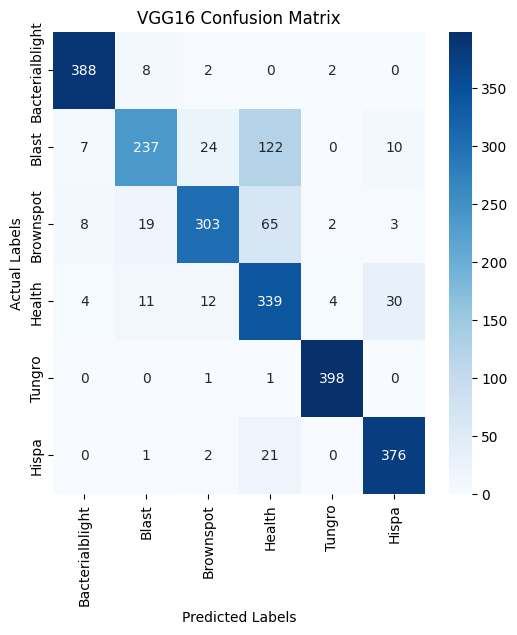

150/150 [==============================] - 11s 67ms/step - loss: 3.5861 - accuracy: 0.8504 - precision: 0.8867 - recall: 0.8217 - f1_score: 0.8492


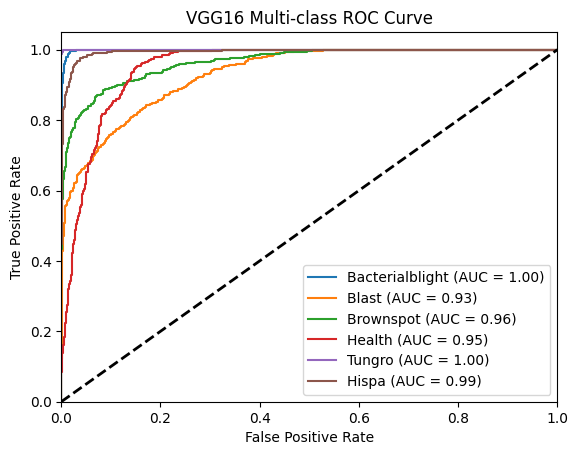

In [49]:
# Evaluate VGG16
evaluate_model_performance(
    model=best_VGGNet_model,
    test_ds=test_ds,
    batch_size=best_batch_size_VGG16,
    class_names=class_names,
    model_name='VGG16'
)

DenseNet

75/75 [==============================] - 11s 138ms/step
DenseNet Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       400
         1.0       0.82      0.71      0.76       400
         2.0       0.92      0.82      0.87       400
         3.0       0.74      0.87      0.80       400
         4.0       0.99      1.00      0.99       400
         5.0       0.95      0.98      0.97       400

    accuracy                           0.89      2400
   macro avg       0.90      0.89      0.89      2400
weighted avg       0.90      0.89      0.89      2400

DenseNet AUC-ROC: 0.9859810416666667
DenseNet F1 Score: 0.8938203307434146


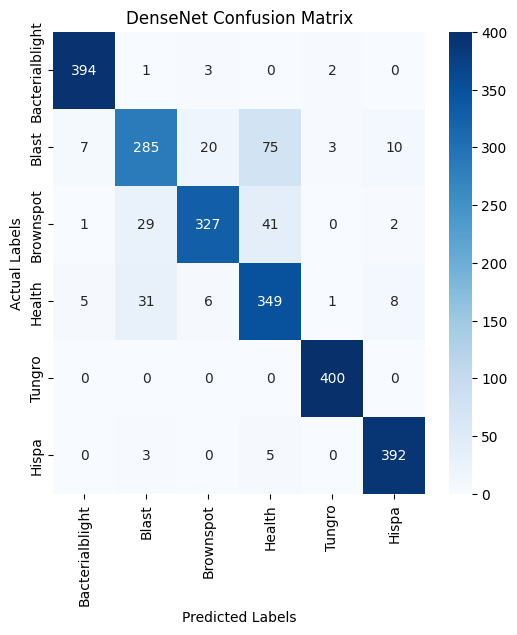

75/75 [==============================] - 11s 133ms/step - loss: 0.1378 - accuracy: 0.8946 - precision: 0.9100 - recall: 0.8758 - f1_score: 0.8901


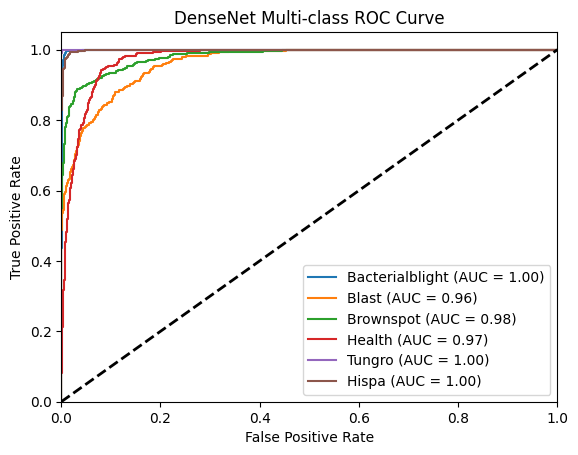

In [50]:
# Evaluate DenseNet
evaluate_model_performance(
    model=best_DenseNet_model,
    test_ds=test_ds,
    batch_size=best_batch_size_DenseNet,
    class_names=class_names,
    model_name='DenseNet'
)

MobileNet

75/75 [==============================] - 11s 138ms/step
MobileNet Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       400
         1.0       0.93      0.84      0.88       400
         2.0       0.92      0.91      0.91       400
         3.0       0.88      0.97      0.92       400
         4.0       1.00      1.00      1.00       400
         5.0       1.00      1.00      1.00       400

    accuracy                           0.95      2400
   macro avg       0.95      0.95      0.95      2400
weighted avg       0.95      0.95      0.95      2400

MobileNet AUC-ROC: 0.9945897916666667
MobileNet F1 Score: 0.9529888727157879


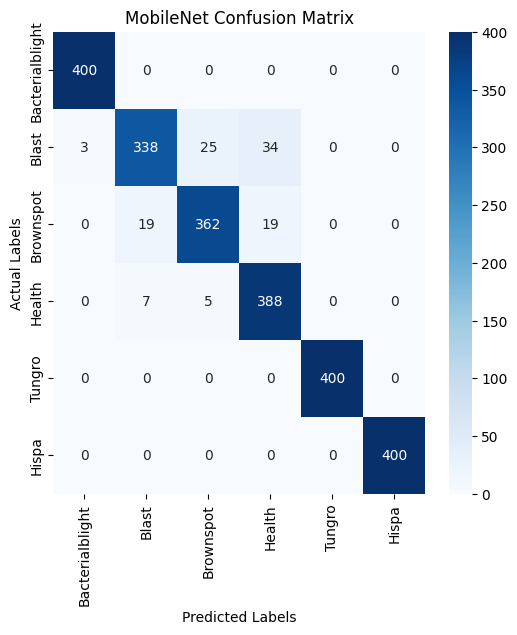

75/75 [==============================] - 10s 133ms/step - loss: 0.1117 - accuracy: 0.9533 - precision: 0.9549 - recall: 0.9525 - f1_score: 0.9533


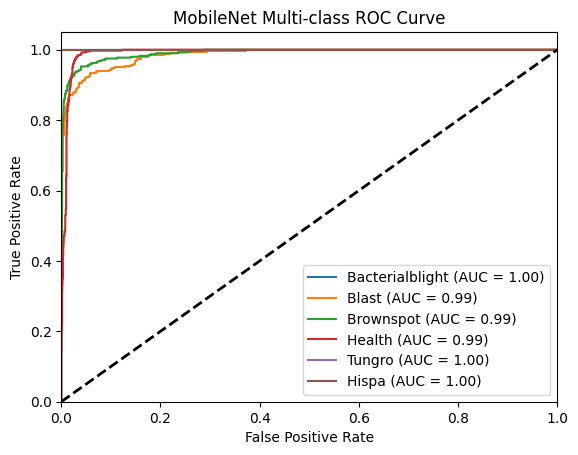

In [51]:
# Evaluate MobileNet
evaluate_model_performance(
    model=best_MobileNet_model,
    test_ds=test_ds,
    batch_size=best_batch_size_MobileNet,
    class_names=class_names,
    model_name='MobileNet'
)

ResNet

75/75 [==============================] - 11s 137ms/step
ResNet Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       400
         1.0       0.89      0.90      0.89       400
         2.0       0.94      0.90      0.92       400
         3.0       0.90      0.92      0.91       400
         4.0       1.00      1.00      1.00       400
         5.0       1.00      1.00      1.00       400

    accuracy                           0.95      2400
   macro avg       0.95      0.95      0.95      2400
weighted avg       0.95      0.95      0.95      2400

ResNet AUC-ROC: 0.9917083333333334
ResNet F1 Score: 0.9537545054161932


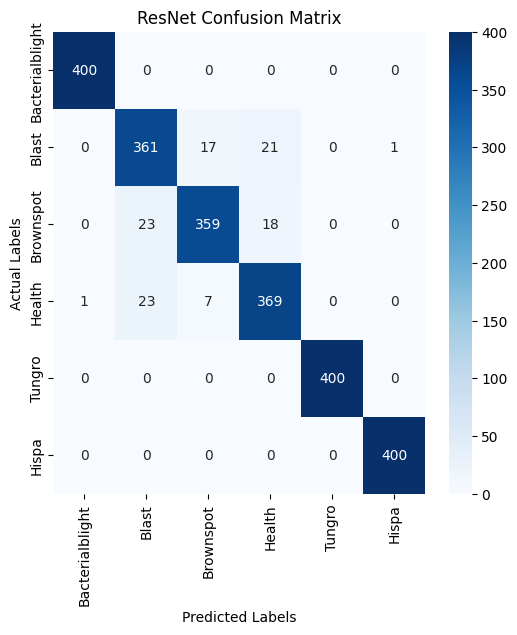

75/75 [==============================] - 11s 134ms/step - loss: 4.7152 - accuracy: 0.9538 - precision: 0.9592 - recall: 0.9492 - f1_score: 0.9539


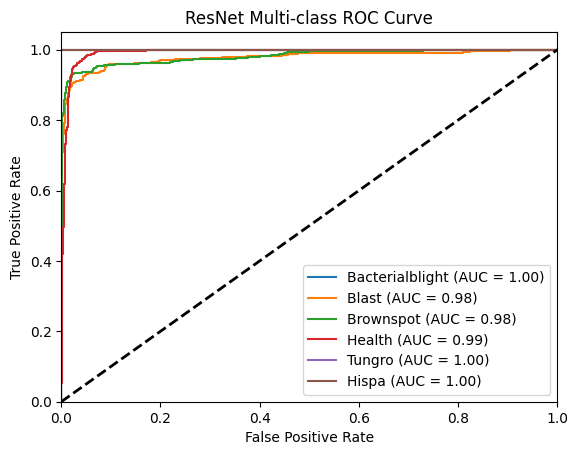

In [52]:
# Evaluate ResNet
evaluate_model_performance(
    model=best_ResNet_model,
    test_ds=test_ds,
    batch_size=best_batch_size_ResNet,
    class_names=class_names,
    model_name='ResNet'
)

EfficientNetB0


300/300 [==============================] - 11s 35ms/step
EfficientNetB0 Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       400
         1.0       0.93      0.84      0.89       400
         2.0       0.93      0.88      0.90       400
         3.0       0.82      0.97      0.89       400
         4.0       1.00      0.99      1.00       400
         5.0       1.00      0.98      0.99       400

    accuracy                           0.94      2400
   macro avg       0.95      0.94      0.94      2400
weighted avg       0.95      0.94      0.94      2400

EfficientNetB0 AUC-ROC: 0.9925829166666666
EfficientNetB0 F1 Score: 0.9447838347576692


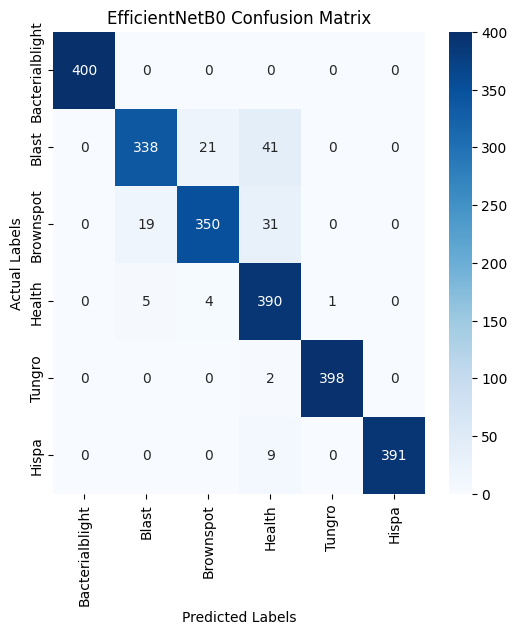

300/300 [==============================] - 11s 35ms/step - loss: 0.7120 - accuracy: 0.9446 - precision: 0.9591 - recall: 0.9175 - f1_score: 0.9373


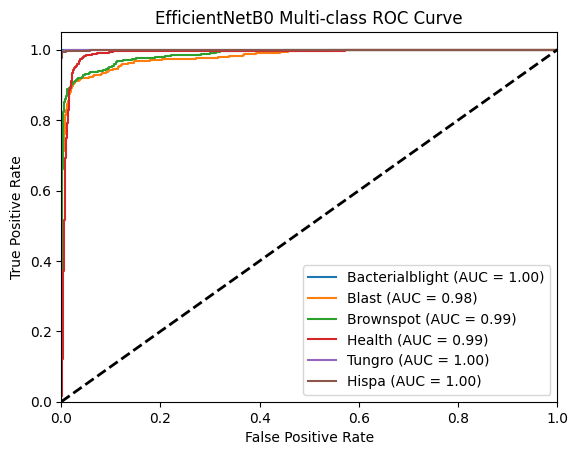

In [53]:
# Evaluate EfficientNetB0
evaluate_model_performance(
    model=best_EfficientNetB0_model,
    test_ds=test_ds,
    batch_size=best_batch_size_efficientnetb0,
    class_names=class_names,
    model_name='EfficientNetB0'
) 